# Import des bibliothèques

In [90]:
#pip install jupyter-dash --user

In [196]:
import plotly.express as px
from dash import dcc
import dash_html_components as html
from dash.dependencies import Input, Output

In [197]:
import pandas as pd
import numpy as np

In [198]:
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [200]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [95]:
from sklearn.decomposition import PCA

In [96]:
from scipy.spatial import ConvexHull
import matplotlib as mpl
import matplotlib.cm as cm

In [97]:
from scipy.stats import f_oneway

In [180]:
import pickle

* Import des differentes bibliothèques nécessaires à notre projet.

# Exploration du dataset

* Nous ouvrons le dataset pour une exploration préliminaire. Le dataset contenant de nombreuses colonnes, on paramètre pandas pour toutes les afficher et on établi un separateur afin que le tableau s'affiche correctement. Les options pandas sont également modifiées afin de pouvoir afficher les tables le plus clairement possible.

In [98]:
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', 500)
#pd.set_option('display.max_colwidth', None)

In [99]:
df = pd.read_csv("fr.openfoodfacts.org.products.csv", sep="\t")
df

C:\Users\TERENC~1.COL\AppData\Local\Temp/ipykernel_11320/3815576941.py:1: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("fr.openfoodfacts.org.products.csv", sep="\t")


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ] [ vegetable-oil -

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


In [101]:
nan_count = df.isna().sum()
nan_count

code                                              23
url                                               23
creator                                            2
created_t                                          3
created_datetime                                   9
last_modified_t                                    0
last_modified_datetime                             0
product_name                                   17762
generic_name                                  267977
quantity                                      215953
packaging                                     241812
packaging_tags                                241811
brands                                         28412
brands_tags                                    28420
categories                                    236362
categories_tags                               236383
categories_fr                                 236361
origins                                       298582
origins_tags                                  

* Nous commencons l'exploration de facon visuelle puis avec les méthodes basiques de pandas .infos() et .isna().

<AxesSubplot: >

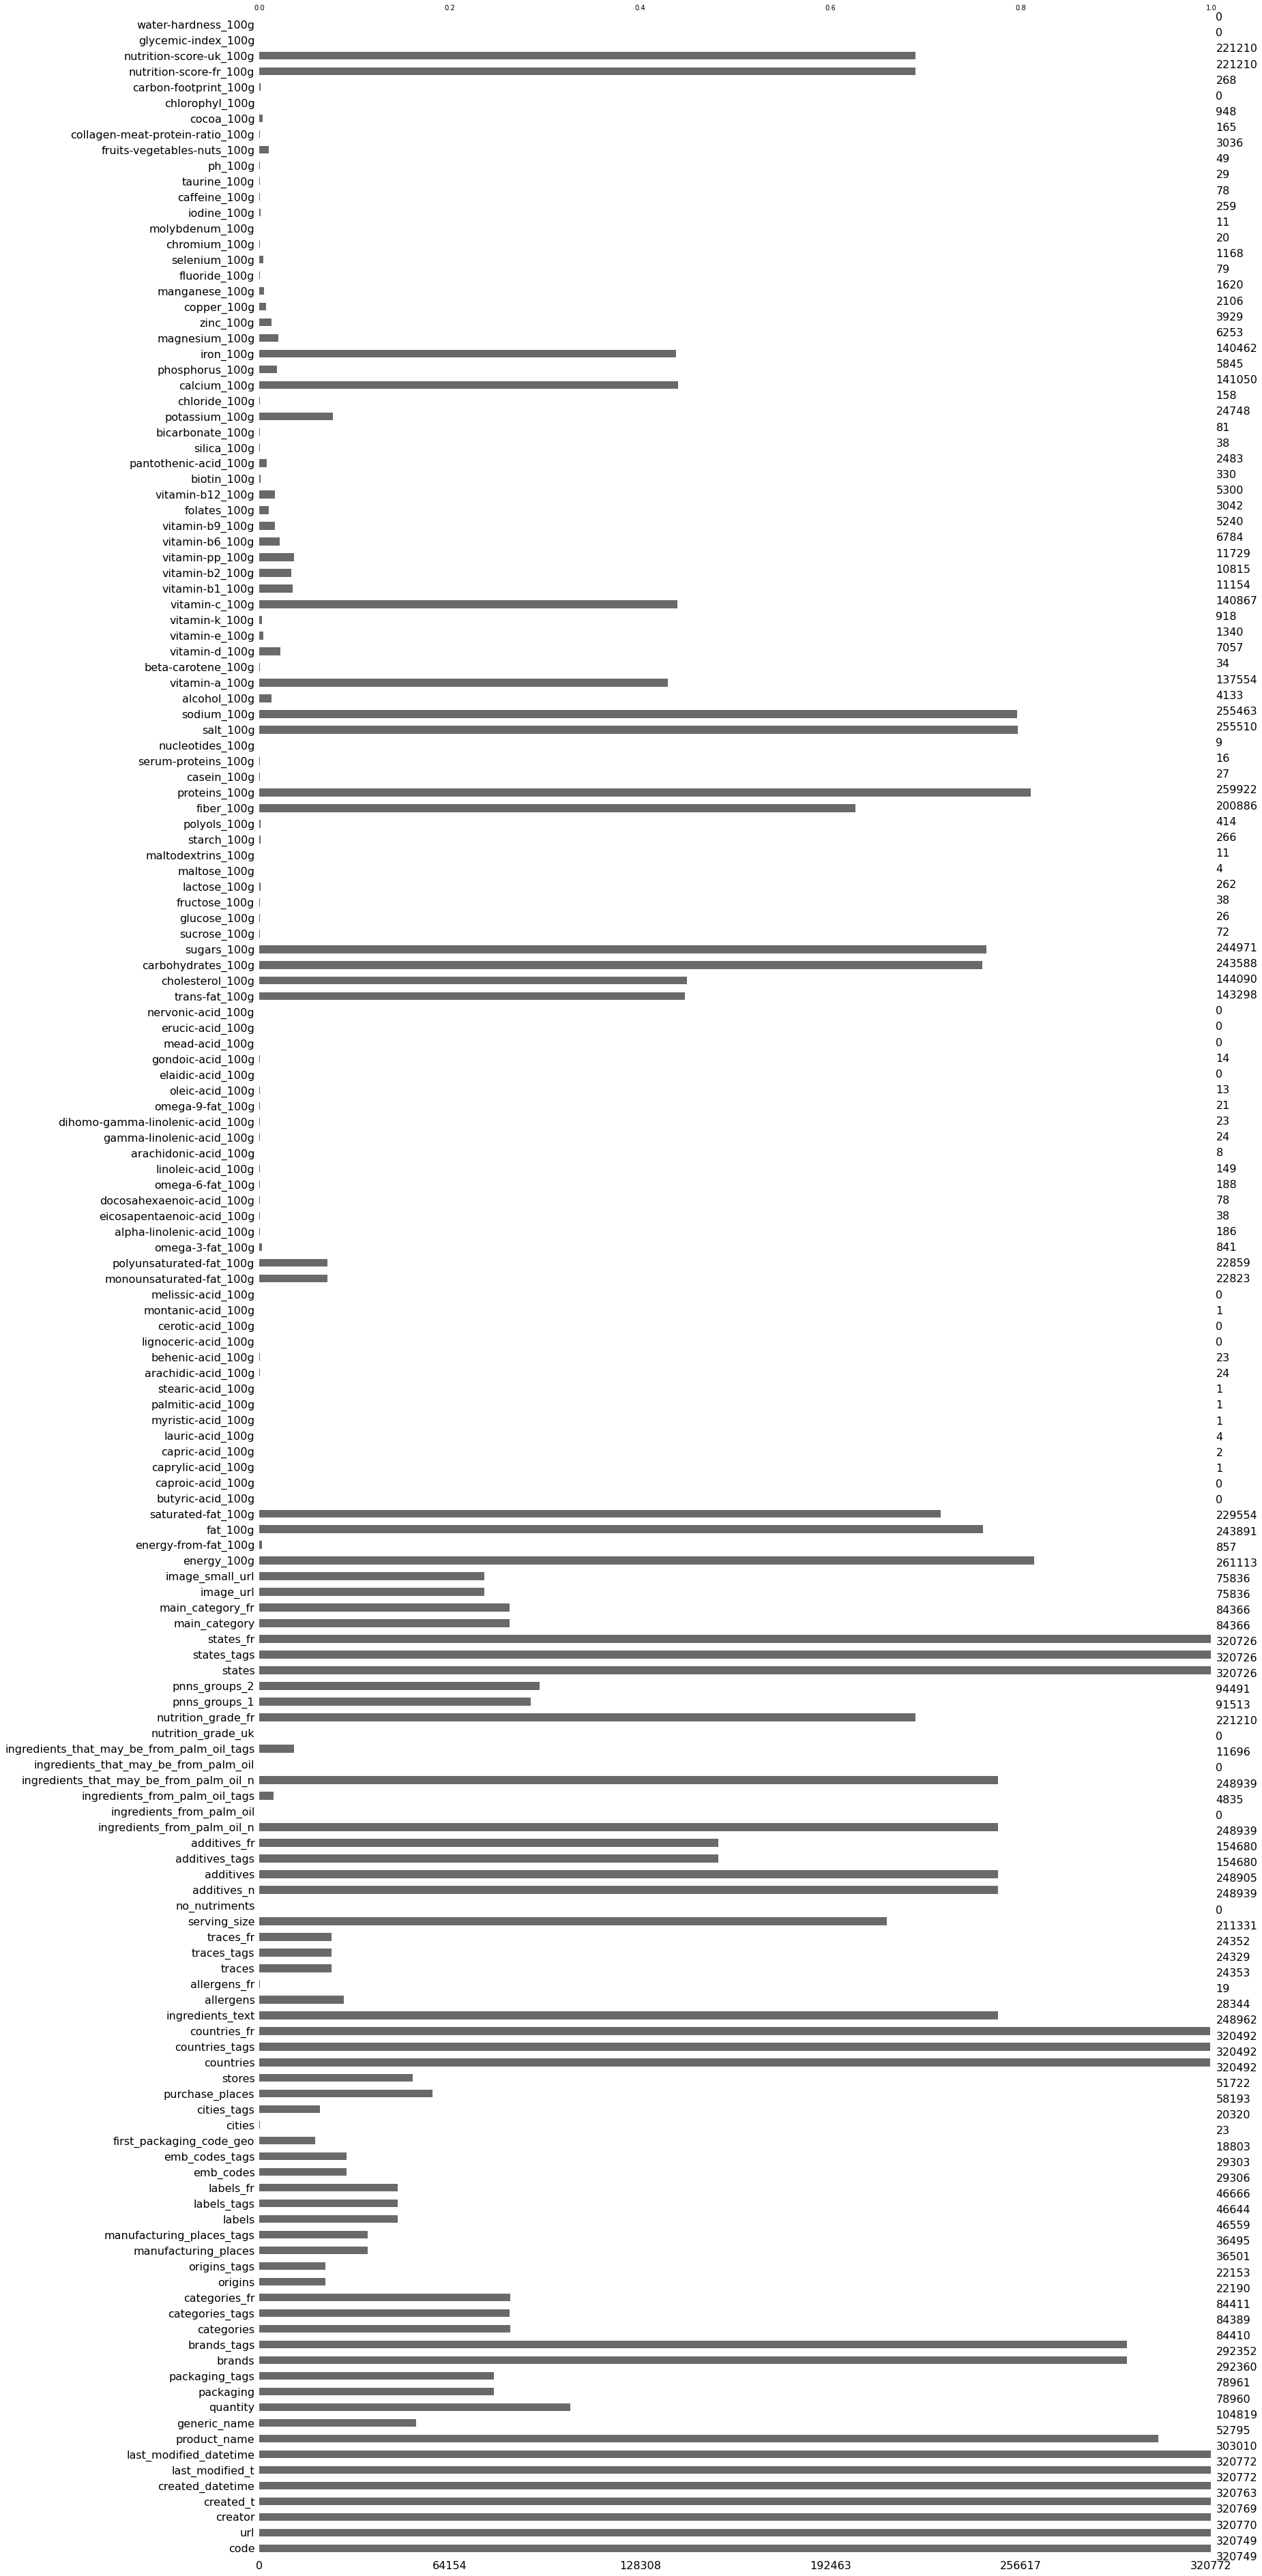

In [102]:
msno.bar(df)

In [103]:
df.isna().mean().round(4) * 100

code                                            0.01
url                                             0.01
creator                                         0.00
created_t                                       0.00
created_datetime                                0.00
last_modified_t                                 0.00
last_modified_datetime                          0.00
product_name                                    5.54
generic_name                                   83.54
quantity                                       67.32
packaging                                      75.38
packaging_tags                                 75.38
brands                                          8.86
brands_tags                                     8.86
categories                                     73.69
categories_tags                                73.69
categories_fr                                  73.69
origins                                        93.08
origins_tags                                  

In [104]:
missing_values = df.isna().sum().sum()
pres_values = df.count().sum()
total_values = missing_values + pres_values

In [105]:
print(f"{missing_values} cellules sont vides dans notre dataset.")
print(f"Celui-ci comprend un total de {total_values} valeurs.")
print(f"{round(missing_values/total_values*100, 2)} % du dataset est manquant.")

39608589 cellules sont vides dans notre dataset.
Celui-ci comprend un total de 51965064 valeurs.
76.22 % du dataset est manquant.


* Un bar plot réalisée à l'aide de missingno nous permet de visualiser l'état de complétion de notre jeu de données. On peux rapidement se rendre compte qu'une bonne partie des données sont manquantes avec des colonnes ne contenant aucunes valeurs.

# Nettoyage

In [106]:
df_cleaned = df.loc[:, df.isnull().mean() < .8]

* Pour commencer, les colonnes ayant un taux de complétion inférieur à 80% sont éliminées.

In [107]:
idx_dic = {}
for col in df_cleaned.columns:
    idx_dic[col] = df_cleaned.columns.get_loc(col)
idx_dic

{'code': 0,
 'url': 1,
 'creator': 2,
 'created_t': 3,
 'created_datetime': 4,
 'last_modified_t': 5,
 'last_modified_datetime': 6,
 'product_name': 7,
 'quantity': 8,
 'packaging': 9,
 'packaging_tags': 10,
 'brands': 11,
 'brands_tags': 12,
 'categories': 13,
 'categories_tags': 14,
 'categories_fr': 15,
 'countries': 16,
 'countries_tags': 17,
 'countries_fr': 18,
 'ingredients_text': 19,
 'serving_size': 20,
 'additives_n': 21,
 'additives': 22,
 'additives_tags': 23,
 'additives_fr': 24,
 'ingredients_from_palm_oil_n': 25,
 'ingredients_that_may_be_from_palm_oil_n': 26,
 'nutrition_grade_fr': 27,
 'pnns_groups_1': 28,
 'pnns_groups_2': 29,
 'states': 30,
 'states_tags': 31,
 'states_fr': 32,
 'main_category': 33,
 'main_category_fr': 34,
 'image_url': 35,
 'image_small_url': 36,
 'energy_100g': 37,
 'fat_100g': 38,
 'saturated-fat_100g': 39,
 'trans-fat_100g': 40,
 'cholesterol_100g': 41,
 'carbohydrates_100g': 42,
 'sugars_100g': 43,
 'fiber_100g': 44,
 'proteins_100g': 45,
 'sal

* Les colonnes étant encore au nombre de 54, Mettre en valeur l'index de celles-ci va nous faciliter la tache dans leur traitement futur.

* Nous allons explorer certaines colonnes de facon individuelle afin de vérifier leur pertinence grace à la fonction pandas .unique().

In [108]:
print(df['pnns_groups_2'].unique())

[nan 'unknown' 'Vegetables' 'Biscuits and cakes' 'Bread' 'Legumes'
 'Pizza pies and quiche' 'Meat' 'Sweets' 'Non-sugared beverages'
 'Sweetened beverages' 'Dressings and sauces' 'One-dish meals'
 'vegetables' 'Soups' 'Chocolate products' 'Alcoholic beverages' 'Fruits'
 'Sandwich' 'Cereals' 'Milk and yogurt' 'Fats' 'Cheese' 'Appetizers'
 'Nuts' 'Breakfast cereals' 'Artificially sweetened beverages'
 'Fruit juices' 'Eggs' 'Fish and seafood' 'Dried fruits' 'Ice cream'
 'Processed meat' 'Potatoes' 'Dairy desserts' 'Fruit nectars' 'pastries'
 'Tripe dishes' 'fruits' 'Salty and fatty products' 'cereals' 'legumes'
 'nuts']


* Nous allons éliminer toutes les colonnes vides, de dates, certaines variables concernant le packaging et les lieux (lieux d achant ou d'emballage) ainsi que les colonnes faisant doublon et analyser le contenu des colones restantes grace à la méthode pandas .unique() afin de continuer à émonder les paramètres inutiles.

In [109]:
df_cleaned.drop(df_cleaned.columns[[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 14, 16, 17, 23, 25, 26, 30, 31, 32, 33, 36, 41, 48, 49, 50, 51, 53]],axis = 1, inplace=True)

C:\Users\TERENC~1.COL\AppData\Local\Temp/ipykernel_11320/1136371258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(df_cleaned.columns[[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 14, 16, 17, 23, 25, 26, 30, 31, 32, 33, 36, 41, 48, 49, 50, 51, 53]],axis = 1, inplace=True)


In [110]:
nan_count = df_cleaned.isna().sum()
nan_count

product_name                17762
brands                      28412
categories                 236362
categories_fr              236361
countries_fr                  280
ingredients_text            71810
serving_size               109441
additives_n                 71833
additives                   71867
additives_fr               166092
nutrition_grade_fr          99562
pnns_groups_1              229259
pnns_groups_2              226281
main_category_fr           236406
image_url                  244936
energy_100g                 59659
fat_100g                    76881
saturated-fat_100g          91218
trans-fat_100g             177474
carbohydrates_100g          77184
sugars_100g                 75801
fiber_100g                 119886
proteins_100g               60850
salt_100g                   65262
sodium_100g                 65309
nutrition-score-fr_100g     99562
dtype: int64

In [111]:
count_duplicates = len(df_cleaned)-len(df_cleaned.drop_duplicates())
count_duplicates

11550

- Par sécurité, nous vérifions si il n'y a pas de lignes en double. C'est effectivement le cas et nous devons les éliminer pour éviter de désequilibrer le dataset.

In [112]:
df_cleaned.drop_duplicates(inplace=True)

C:\Users\TERENC~1.COL\AppData\Local\Temp/ipykernel_11320/1556128341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop_duplicates(inplace=True)


In [113]:
df_cleaned['countries_fr'].value_counts()

États-Unis                                      169965
France                                           89794
Suisse                                           13930
Allemagne                                         7258
Espagne                                           4815
                                                 ...  
Danemark,Suisse,en:Deutschland,en:Frankreich         1
France,Luxembourg,Suisse                             1
Autriche,République tchèque,Allemagne                1
Allemagne,Hongrie                                    1
Chine,Hong Kong                                      1
Name: countries_fr, Length: 722, dtype: int64

In [114]:
cat_pays = df_cleaned['countries_fr'].value_counts()
big_cat_pays = cat_pays[cat_pays >= 4000]
small_cat_pays = cat_pays[cat_pays < 4000]
small_sums = pd.Series([small_cat_pays.sum()], index=["Autres"])
pays_total = big_cat_pays.append(small_sums)
pays_total

C:\Users\TERENC~1.COL\AppData\Local\Temp/ipykernel_11320/341717636.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pays_total = big_cat_pays.append(small_sums)


États-Unis     169965
France          89794
Suisse          13930
Allemagne        7258
Espagne          4815
Royaume-Uni      4568
Autres          18623
dtype: int64

([<matplotlib.patches.Wedge at 0x1911e1e93a0>,
 [Text(-0.1725291737809354, 1.0863856056642447, 'États-Unis'),
  Text(-0.36967058087614024, -1.0360230024640849, 'France'),
  Text(0.7186707517192011, -0.832773889254075, 'Suisse'),
  Text(0.8800918677984071, -0.6598774918385315, 'Allemagne'),
  Text(0.9542743844530542, -0.5471383729704439, 'Espagne'),
  Text(1.0020580988185286, -0.45373953606909345, 'Royaume-Uni'),
  Text(1.0803356773460382, -0.20706236802779274, 'Autres')],
 [Text(-0.09410682206232839, 0.5925739667259516, '55%'),
  Text(-0.20163849865971284, -0.5651034558895008, '29%'),
  Text(0.3920022282104733, -0.45424030322949543, '5%'),
  Text(0.480050109708222, -0.35993317736647173, '2%'),
  Text(0.5205133006107567, -0.29843911252933303, '2%'),
  Text(0.5465771448101064, -0.24749429240132365, '1%'),
  Text(0.5892740058251117, -0.11294310983334147, '6%')])

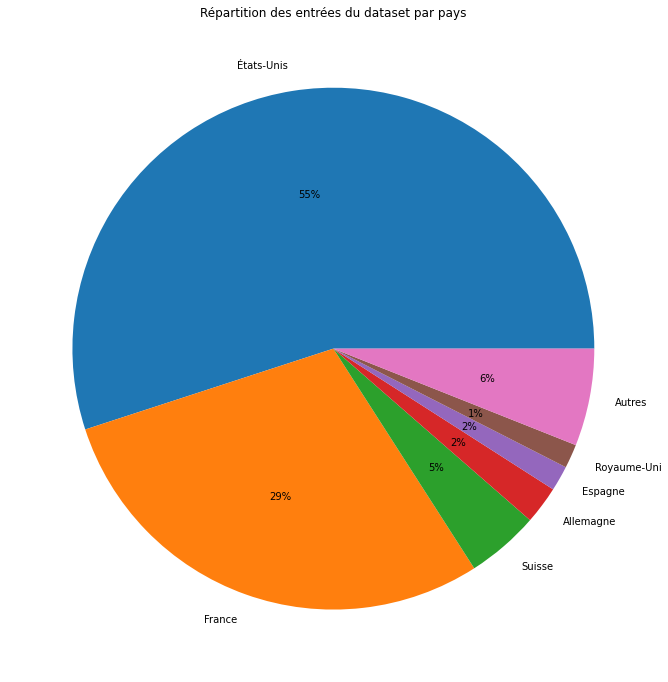

In [115]:
fig = plt.figure(figsize=(12, 12))

plt.title("Répartition des entrées du dataset par pays")
plt.pie(pays_total, labels=pays_total.index, autopct='%.0f%%')

* En éliminant les lignes associées à des pays dont le total des données est inférieur à 4000 lignes, nous éliminons de facon simple tout les problèmes liés aux différents alphabets pouvant crer des problèmes techniques, ainsi que les données concernant des pays dont les informations nutritionneles sont moins complètes ou fonctionnent différement.

* Le graphe en tarte après rassemblement des valeurs les plus basses de la feature "countries_fr" permet de confirmer que l'élimination de ces valeurs permettra tout de meme de conserver un dataset important et pertinent dans le cadre de notre application web.

* Pour finir nous éliminons les lignes dont la valeur product_name est manquante. En effet, garder ces lignes ne sert à rien dans notre projet si on ne peux pas le lier à un aliment.

In [116]:
df_cleaned = df_cleaned[df_cleaned['countries_fr'].str.contains('États-Unis|France|Suisse|Allemagne|Espagne|Royaume-Uni') == True]
df_cleaned = df_cleaned.reset_index(drop=True)
df_cleaned

,product_name,brands,categories,categories_fr,countries_fr,ingredients_text,serving_size,additives_n,additives,additives_fr,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category_fr,image_url,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,Farine de blé noir,Ferme t'y R'nao,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Banana Chips Sweetened (Whole),NaN,NaN,NaN,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,d,NaN,NaN,NaN,NaN,2243.0,28.57,28.57,0.0,64.29,14.29,3.6,3.57,0.00000,0.000,14.0
2,Peanuts,Torn & Glasser,NaN,NaN,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,NaN,b,NaN,NaN,NaN,NaN,1941.0,17.86,0.00,0.0,60.71,17.86,7.1,17.86,0.63500,0.250,0.0
3,Organic Salted Nut Mix,Grizzlies,NaN,NaN,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,NaN,d,NaN,NaN,NaN,NaN,2540.0,57.14,5.36,NaN,17.86,3.57,7.1,17.86,1.22428,0.482,12.0
4,Organic Polenta,Bob's Red Mill,NaN,NaN,États-Unis,Organic polenta,35 g (0.25 cup),0.0,[ organic-polenta -> en:organic-polenta ] [...,NaN,NaN,NaN,NaN,NaN,NaN,1552.0,1.43,NaN,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295211,Rillette d'oie,"Sans marque,D.Lambert","Viandes,Produits à tartiner,Charcuteries,Produ...","Viandes,Produits à tartiner,Charcuteries,Produ...",France,"viande d'oie, graisse de canard, épices, sel, ...",NaN,0.0,[ viande-d-oie -> fr:viande-d-oie ] [ viand...,NaN,NaN,Fish Meat Eggs,Processed meat,Produits à tartiner salés,http://fr.openfoodfacts.org/images/products/99...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295212,NaN,NaN,Peanuts,"Aliments et boissons à base de végétaux,Alimen...",Royaume-Uni,NaN,NaN,NaN,NaN,NaN,NaN,Salty snacks,Nuts,Fruits à coques,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295213,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,NaN,NaN,États-Unis,"Organic peppermint, organic lemon grass, organ...",20 g (0.7 oz),0.0,[ organic-peppermint -> en:organic-peppermint...,NaN,b,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00000,0.000,0.0
295214,Tomates aux Vermicelles,Knorr,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: >

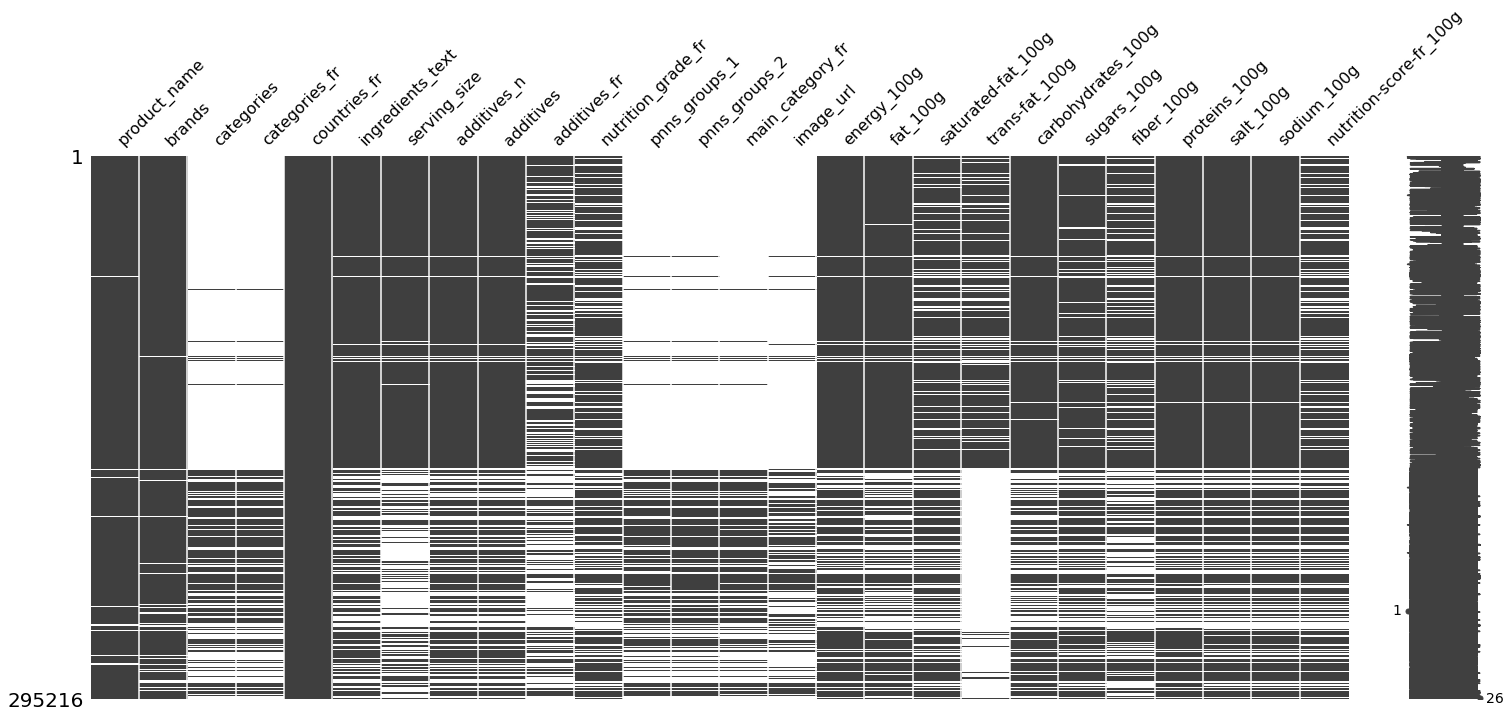

In [117]:
msno.matrix(df_cleaned)

In [118]:
nan_count = df_cleaned.isna().sum(axis = 1)

In [119]:
nan_count = df_cleaned.loc[[0]].isna().sum().sum()
nan_count

23

In [120]:
incomplete_row = 0
for i in range(len(df_cleaned)):
    # print(df_cleaned.loc[i].isna().sum().sum())
    if df_cleaned.loc[i].isna().sum().sum() > 22:
        # print(df_cleaned.loc[i])
        incomplete_row += 1
print(incomplete_row)

15452


* Nous éliminons les lignes trop incomplètes pour etre utiles en l'état et pouvoir etre complété ultérieurement.

In [121]:
df_cleaned.describe()

,additives_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,241524.000000,2.536400e+05,236496.000000,223979.000000,140797.000000,236207.000000,239172.000000,196816.000000,252534.000000,249190.000000,249143.000000,216186.000000
mean,1.953885,1.143233e+03,12.691914,5.128111,0.073672,32.167253,16.007449,2.858083,7.095513,2.038637,0.802763,9.179346
std,2.511207,6.539512e+03,17.426954,8.004223,1.551892,29.729579,22.339350,12.979644,8.422633,129.878984,51.138279,9.051680
min,0.000000,0.000000e+00,0.000000,0.000000,-3.570000,0.000000,-17.860000,-6.700000,-800.000000,0.000000,0.000000,-15.000000
25%,0.000000,3.810000e+02,0.000000,0.000000,0.000000,6.060000,1.300000,0.000000,0.700000,0.063500,0.025000,1.000000
50%,1.000000,1.100000e+03,5.000000,1.790000,0.000000,21.000000,5.710000,1.500000,4.760000,0.589280,0.232000,10.000000
75%,3.000000,1.674000e+03,20.000000,7.140000,0.000000,58.400000,24.000000,3.600000,10.000000,1.381760,0.544000,16.000000
max,31.000000,3.251373e+06,714.290000,550.000000,369.000000,2916.670000,3520.000000,5380.000000,430.000000,64312.800000,25320.000000,40.000000


In [122]:
(df_cleaned[['trans-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'nutrition-score-fr_100g']] < 0).sum()

trans-fat_100g                 4
sugars_100g                    7
fiber_100g                     1
proteins_100g                  3
nutrition-score-fr_100g    34802
dtype: int64

In [123]:
columns_to_clean = ['trans-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g']

for column in columns_to_clean:
    print("\n" + column.upper())
    print(df[['trans-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'nutrition-score-fr_100g']].loc[df[column] < 0])


TRANS-FAT_100G
        trans-fat_100g  sugars_100g  fiber_100g  proteins_100g  \
23576            -3.03         3.03         9.1           9.09   
107990           -0.70        20.42         2.1           3.52   
120692           -1.00         0.00         0.0          18.00   
153498           -3.57        10.71         3.6           7.14   

        nutrition-score-fr_100g  
23576                      21.0  
107990                     14.0  
120692                      1.0  
153498                     12.0  

SUGARS_100G
        trans-fat_100g  sugars_100g  fiber_100g  proteins_100g  \
8582               0.0        -1.20         1.2           2.41   
18209              0.0        -0.80         0.8           0.80   
117739             0.0        -3.57         3.6           7.14   
146284             0.0        -6.67         6.7            NaN   
150858             0.0        -6.25         1.2           1.25   
164030             0.0       -17.86        17.9          17.86   
195761  

In [124]:
df_cleaned[df_cleaned[['trans-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g']] < 0] = np.nan
(df_cleaned[['trans-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'nutrition-score-fr_100g']] < 0).sum()

trans-fat_100g                 0
sugars_100g                    0
fiber_100g                     0
proteins_100g                  0
nutrition-score-fr_100g    34802
dtype: int64

* La présence de valeur nutritionnelles négatives dans le dataset semble etre le résultat, d'erreurs. Nous vérifions leur nombre, qui est annecdotique et ces valeurs peuvent donc etre éliminés, sauf en ce qui concerne la colonne "nutrition-score-fr_100g" qui nécessite de nous pencher un peu plus sur son cas.

In [126]:
df_cleaned.loc[df_cleaned['salt_100g'] > 64000]

,product_name,brands,categories,categories_fr,countries_fr,ingredients_text,serving_size,additives_n,additives,additives_fr,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category_fr,image_url,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
141590,Prickly Syrup,K. Benson Company,NaN,NaN,États-Unis,"Prickly pear juice, corn syrup, citric acid, f...",79 g (0.25 cup),2.0,[ prickly-pear-juice -> en:prickly-pear-juice...,"E330 - Acide citrique,E129 - Rouge allura AC",e,NaN,NaN,NaN,NaN,1218.0,0.0,0.0,0.0,72.15,53.16,NaN,0.0,64312.8,25320.0,23.0


In [127]:
def nutition_grade_to_numeric(value):
    if value == "a":
        return 0
    elif value == "b":
        return 1
    elif value == "c":
        return 2
    elif value == "d":
        return 3
    elif value == "e":
        return 4
 
df_cleaned['nutrition_grade_numeric'] = df_cleaned['nutrition_grade_fr'].map(nutition_grade_to_numeric)

* Nous créons une nouvelle colonne numérique basé sur les grades nutritinnels francais, afin de pouvoir plus facilement travailler avec ces valeurs. En fin de nettoyage nous les retransformerons en "A, B, C, D, E" pour que la page web soit plus compréhensible pour ses visiteurs francais.

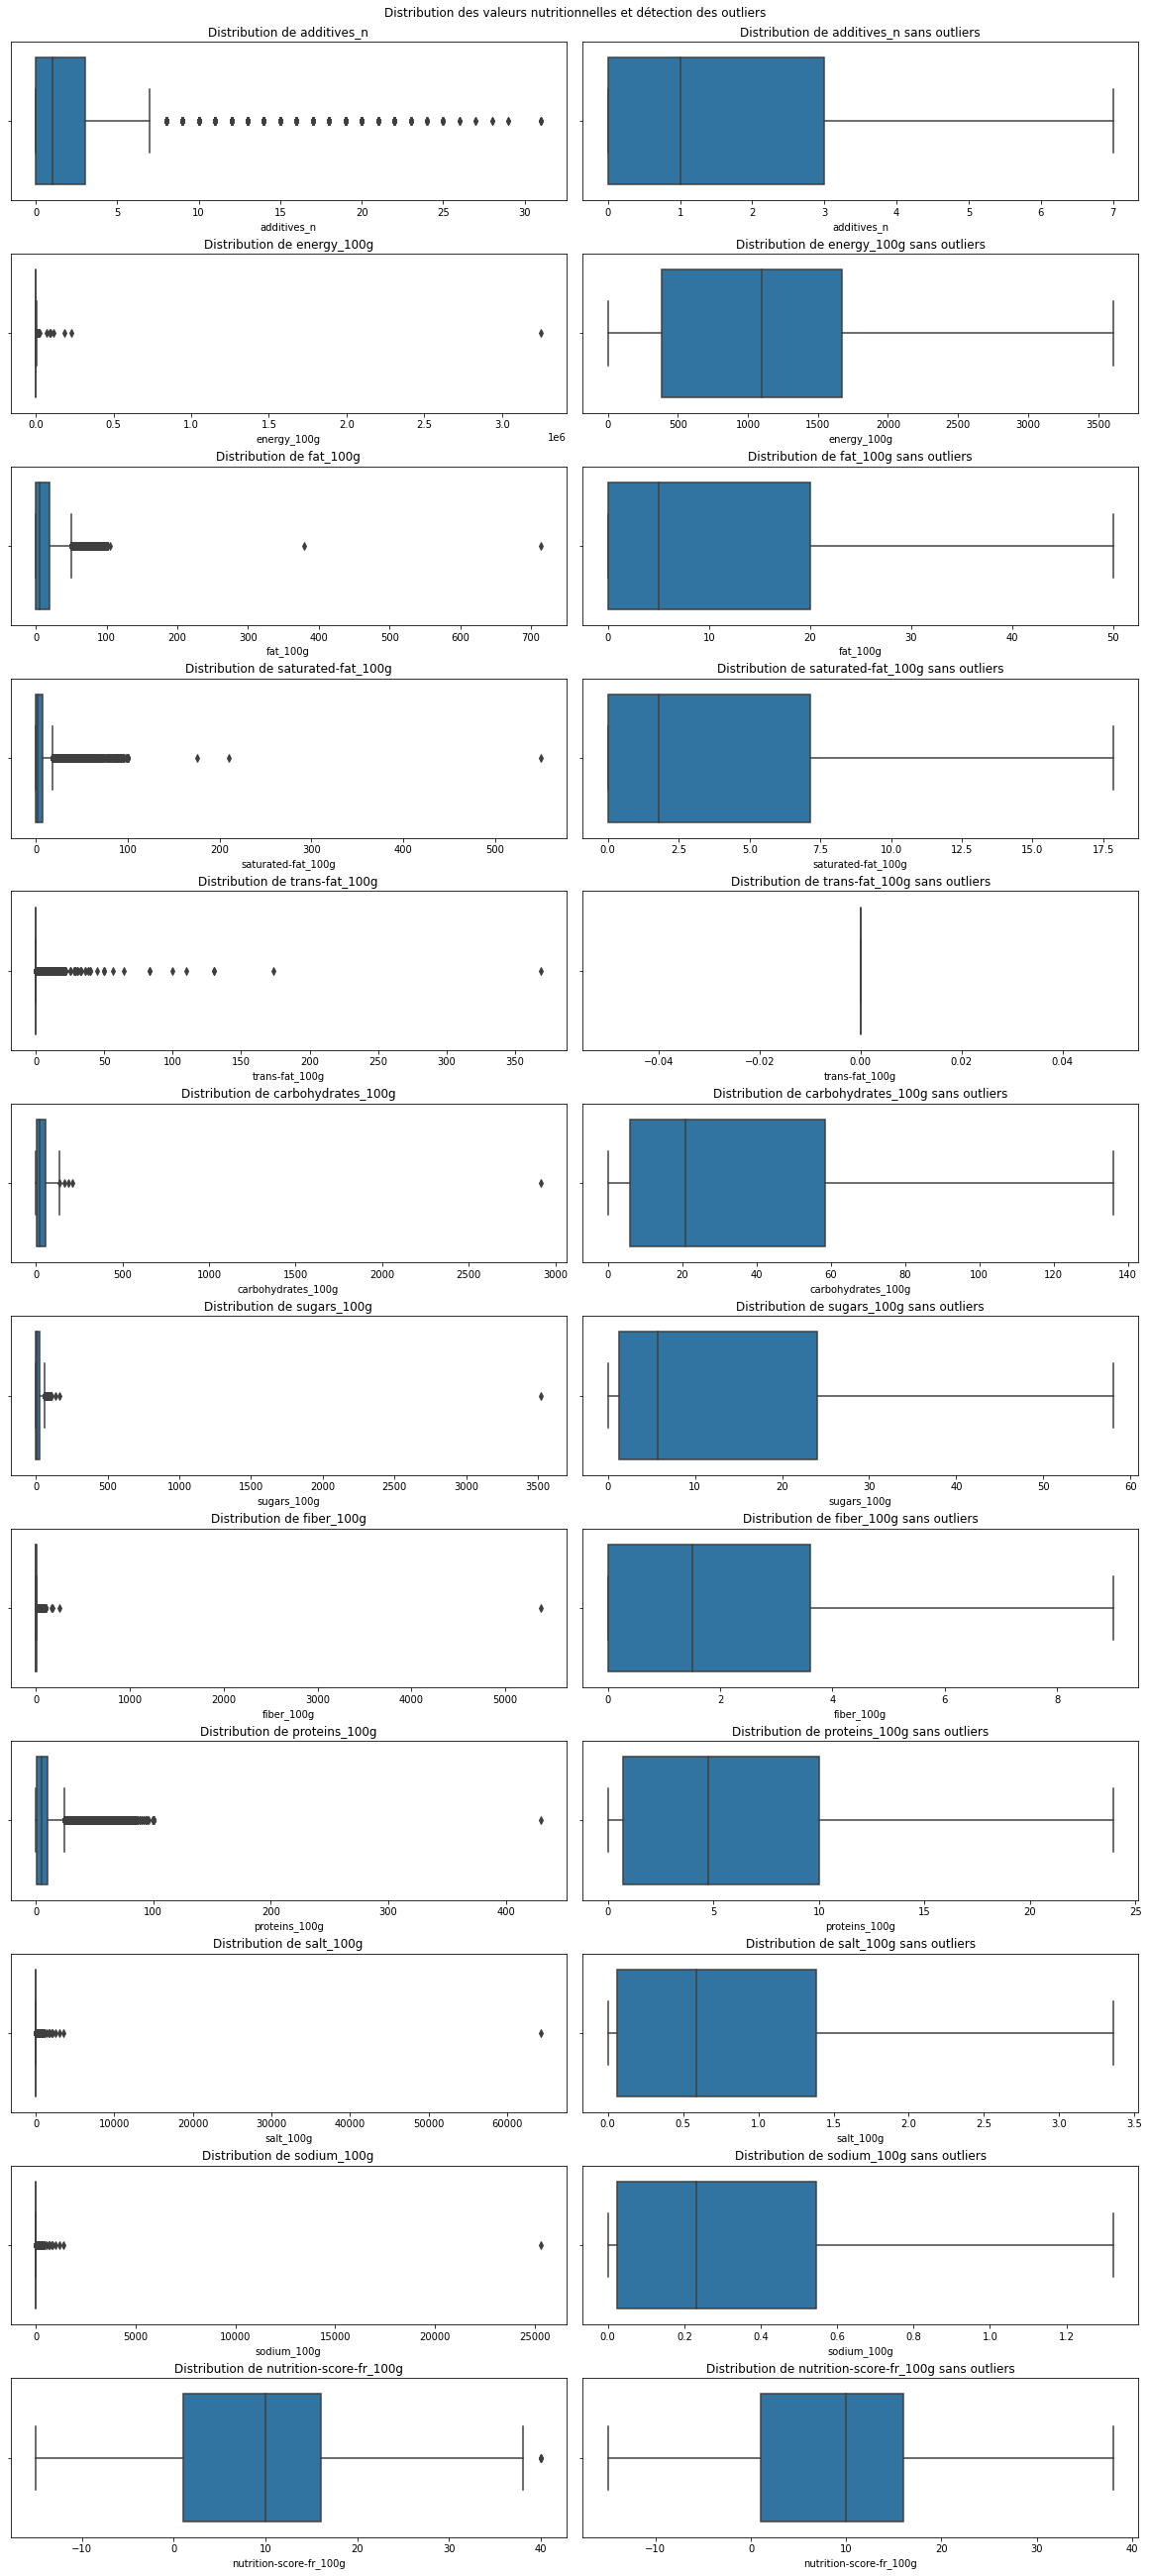

In [128]:
fig, axs = plt.subplots(nrows=12, ncols=2, constrained_layout=True, figsize=(16, 36))
fig.suptitle('Distribution des valeurs nutritionnelles et détection des outliers')

sns.boxplot(data=df_cleaned, x="additives_n", ax=axs[0, 0]).set(title="Distribution de additives_n")
sns.boxplot(data=df_cleaned, x="additives_n", showfliers = False, ax=axs[0, 1]).set(title="Distribution de additives_n sans outliers")
sns.boxplot(data=df_cleaned, x="energy_100g", ax=axs[1, 0]).set(title="Distribution de energy_100g")
sns.boxplot(data=df_cleaned, x="energy_100g", showfliers = False, ax=axs[1, 1]).set(title="Distribution de energy_100g sans outliers")
sns.boxplot(data=df_cleaned, x="fat_100g", ax=axs[2, 0]).set(title="Distribution de fat_100g")
sns.boxplot(data=df_cleaned, x="fat_100g", showfliers = False, ax=axs[2, 1]).set(title="Distribution de fat_100g sans outliers")
sns.boxplot(data=df_cleaned, x="saturated-fat_100g", ax=axs[3, 0]).set(title="Distribution de saturated-fat_100g")
sns.boxplot(data=df_cleaned, x="saturated-fat_100g", showfliers = False, ax=axs[3, 1]).set(title="Distribution de saturated-fat_100g sans outliers")
sns.boxplot(data=df_cleaned, x="trans-fat_100g", ax=axs[4, 0]).set(title="Distribution de trans-fat_100g")
sns.boxplot(data=df_cleaned, x="trans-fat_100g", showfliers = False, ax=axs[4, 1]).set(title="Distribution de trans-fat_100g sans outliers")
sns.boxplot(data=df_cleaned, x="carbohydrates_100g", ax=axs[5, 0]).set(title="Distribution de carbohydrates_100g")
sns.boxplot(data=df_cleaned, x="carbohydrates_100g", showfliers = False, ax=axs[5, 1]).set(title="Distribution de carbohydrates_100g sans outliers")
sns.boxplot(data=df_cleaned, x="sugars_100g", ax=axs[6, 0]).set(title="Distribution de sugars_100g")
sns.boxplot(data=df_cleaned, x="sugars_100g", showfliers = False, ax=axs[6, 1]).set(title="Distribution de sugars_100g sans outliers")
sns.boxplot(data=df_cleaned, x="fiber_100g", ax=axs[7, 0]).set(title="Distribution de fiber_100g")
sns.boxplot(data=df_cleaned, x="fiber_100g", showfliers = False, ax=axs[7, 1]).set(title="Distribution de fiber_100g sans outliers")
sns.boxplot(data=df_cleaned, x="proteins_100g", ax=axs[8, 0]).set(title="Distribution de proteins_100g")
sns.boxplot(data=df_cleaned, x="proteins_100g", showfliers = False, ax=axs[8, 1]).set(title="Distribution de proteins_100g sans outliers")
sns.boxplot(data=df_cleaned, x="salt_100g", ax=axs[9, 0]).set(title="Distribution de salt_100g")
sns.boxplot(data=df_cleaned, x="salt_100g", showfliers = False, ax=axs[9, 1]).set(title="Distribution de salt_100g sans outliers")
sns.boxplot(data=df_cleaned, x="sodium_100g", ax=axs[10, 0]).set(title="Distribution de sodium_100g")
sns.boxplot(data=df_cleaned, x="sodium_100g", showfliers = False, ax=axs[10, 1]).set(title="Distribution de sodium_100g sans outliers")
sns.boxplot(data=df_cleaned, x="nutrition-score-fr_100g", ax=axs[11, 0]).set(title="Distribution de nutrition-score-fr_100g")
sns.boxplot(data=df_cleaned, x="nutrition-score-fr_100g", showfliers = False, ax=axs[11, 1]).set(title="Distribution de nutrition-score-fr_100g sans outliers")

plt.show()

In [129]:
df_cleaned.drop(df_cleaned[df_cleaned['energy_100g'] > 10000].index, inplace = True)
df_cleaned.drop(df_cleaned[df_cleaned['fat_100g'] > 400].index, inplace = True)
df_cleaned.drop(df_cleaned[df_cleaned['trans-fat_100g'] > 300].index, inplace = True)
df_cleaned.drop(df_cleaned[df_cleaned['proteins_100g'] > 400].index, inplace = True)
df_cleaned.drop(df_cleaned[df_cleaned['carbohydrates_100g'] > 2500].index, inplace = True)
df_cleaned.drop(df_cleaned[df_cleaned['sugars_100g'] > 3000].index, inplace = True)

features_to_manage = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']


for feature in features_to_manage:
    Q1 = df_cleaned[feature].quantile(0.25)
    Q3 = df_cleaned[feature].quantile(0.75)
    IQR = Q3 - Q1
    print(f'{feature} : {IQR}')
    df_cleaned = df_cleaned[~((df_cleaned[feature] < (Q1 - 1.5 * IQR)) |(df_cleaned[feature] > (Q3 + 1.5 * IQR)))]

df_cleaned.shape

energy_100g : 1293.0
fat_100g : 20.0
saturated-fat_100g : 6.82
carbohydrates_100g : 53.33
sugars_100g : 21.31
fiber_100g : 3.6
proteins_100g : 8.78
salt_100g : 1.27635
sodium_100g : 0.4444409448818898


(220364, 27)

* Après analyse visuelle, les valeurs clairement abberantes sont éliminées puis le reste des outliers est traité grace à l'écart-interquartile. Comme observé grace au box plot de seaborn et au paramètre showfliers, éliminer les outliers de la feature trans_fat_100g effacerait toutes les valeurs, celle-ci est donc laissé hors du traitement.

* 320772-304286 = 16486 lignes ont été éliminées dans l'opération.

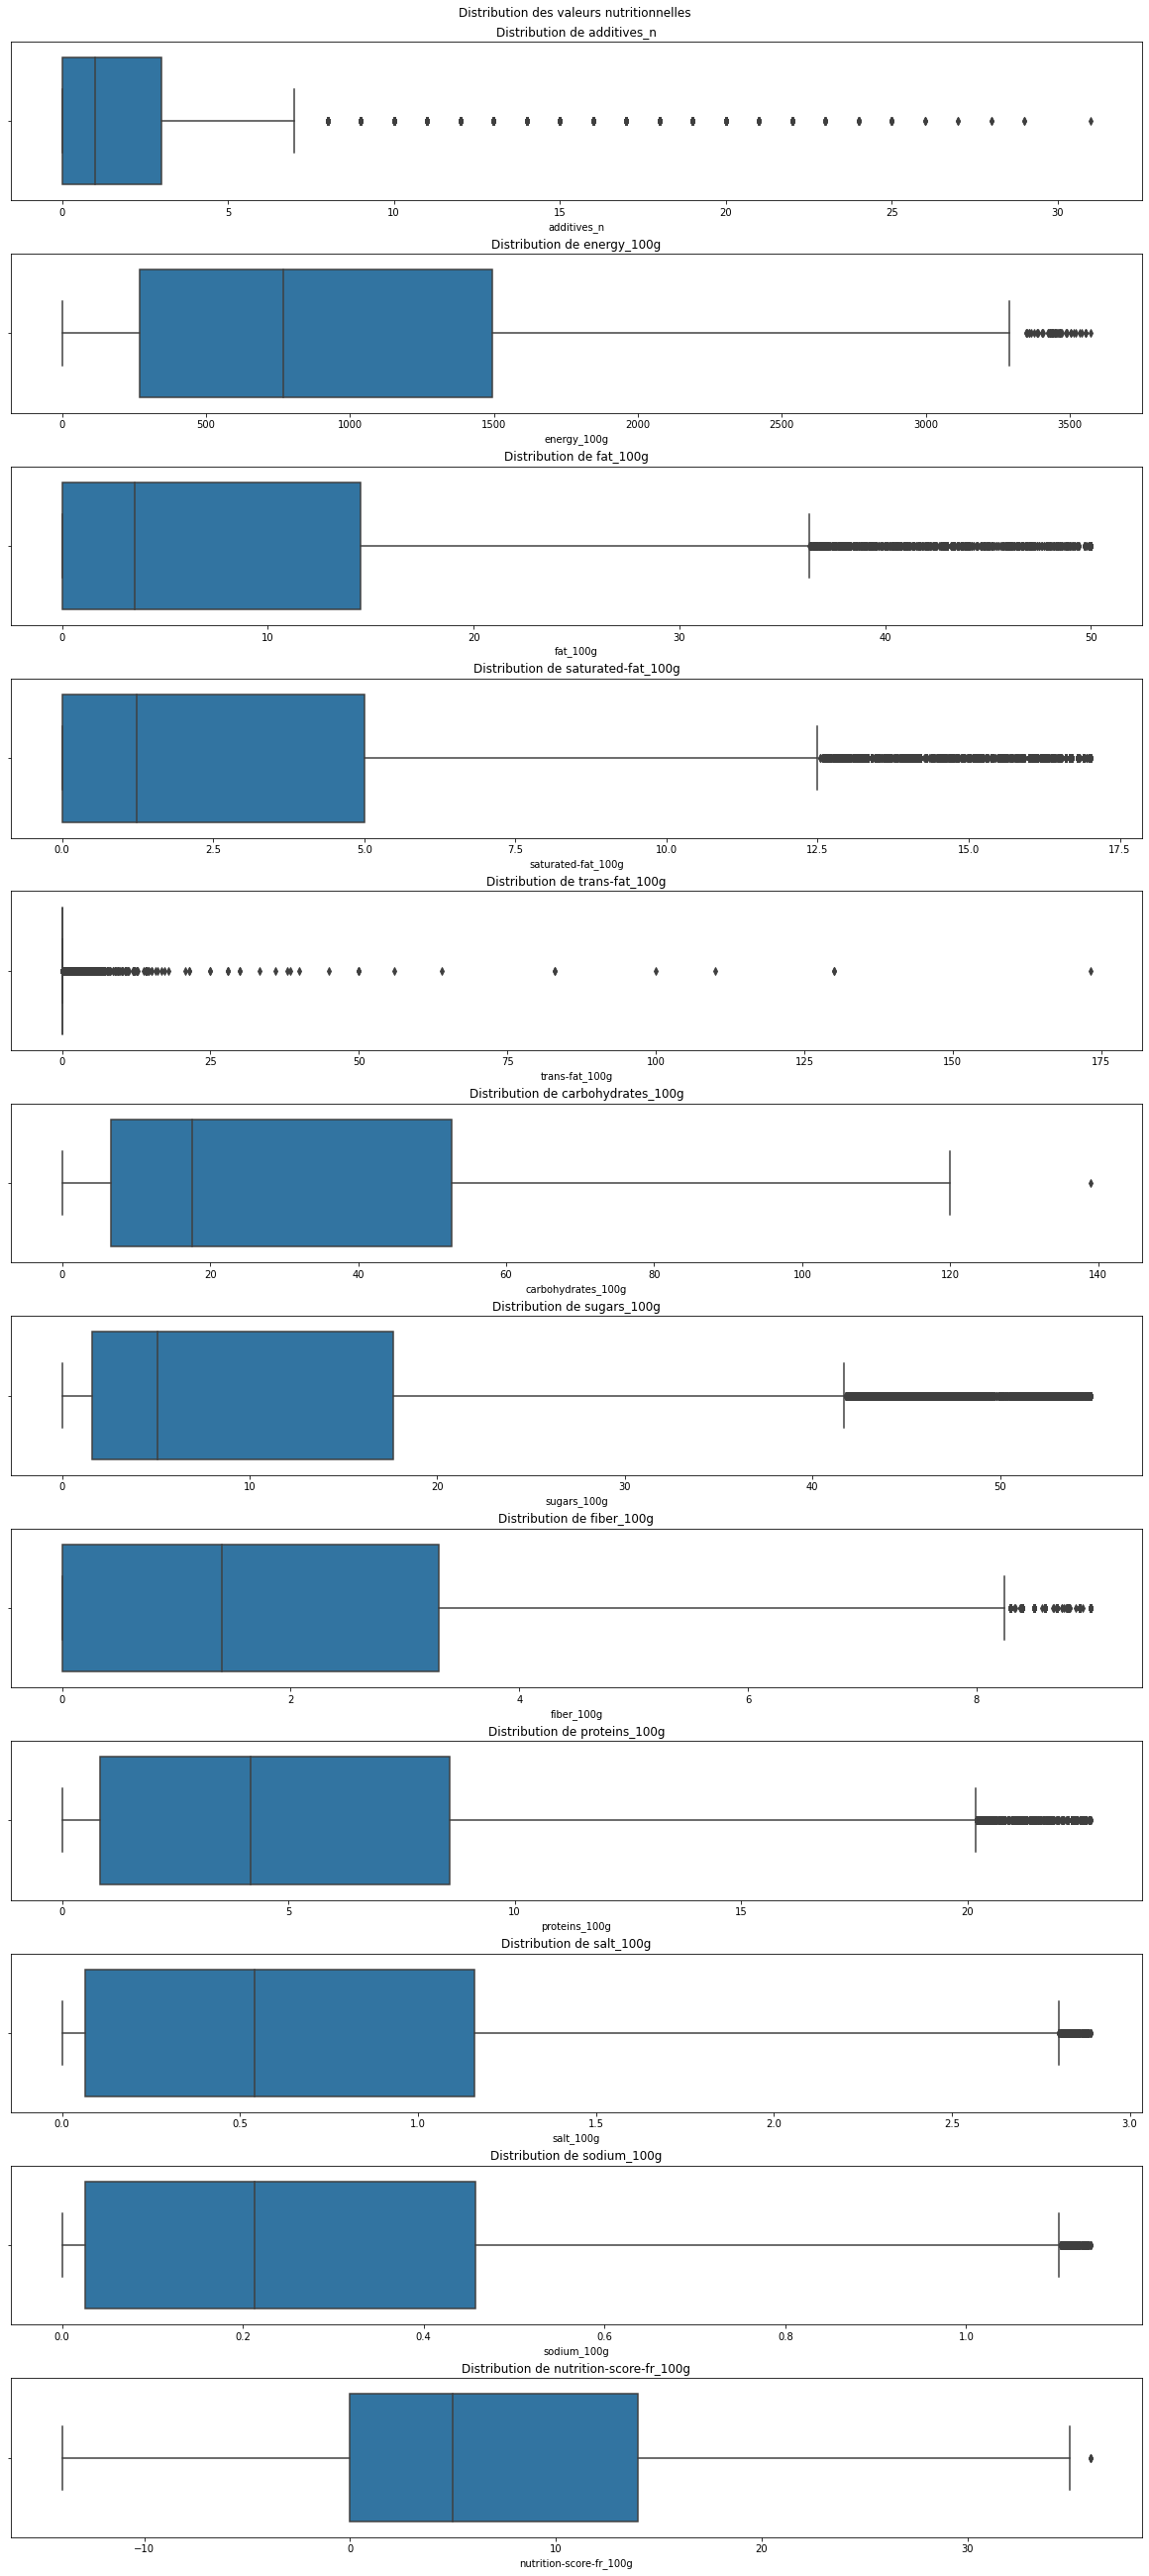

In [130]:
fig, axs = plt.subplots(nrows=12, ncols=1, constrained_layout=True, figsize=(16, 36))
fig.suptitle('Distribution des valeurs nutritionnelles')

sns.boxplot(data=df_cleaned, x="additives_n", ax=axs[0]).set(title="Distribution de additives_n")
sns.boxplot(data=df_cleaned, x="energy_100g", ax=axs[1]).set(title="Distribution de energy_100g")
sns.boxplot(data=df_cleaned, x="fat_100g", ax=axs[2]).set(title="Distribution de fat_100g")
sns.boxplot(data=df_cleaned, x="saturated-fat_100g", ax=axs[3]).set(title="Distribution de saturated-fat_100g")
sns.boxplot(data=df_cleaned, x="trans-fat_100g", ax=axs[4]).set(title="Distribution de trans-fat_100g")
sns.boxplot(data=df_cleaned, x="carbohydrates_100g", ax=axs[5]).set(title="Distribution de carbohydrates_100g")
sns.boxplot(data=df_cleaned, x="sugars_100g", ax=axs[6]).set(title="Distribution de sugars_100g")
sns.boxplot(data=df_cleaned, x="fiber_100g", ax=axs[7]).set(title="Distribution de fiber_100g")
sns.boxplot(data=df_cleaned, x="proteins_100g", ax=axs[8]).set(title="Distribution de proteins_100g")
sns.boxplot(data=df_cleaned, x="salt_100g", ax=axs[9]).set(title="Distribution de salt_100g")
sns.boxplot(data=df_cleaned, x="sodium_100g", ax=axs[10]).set(title="Distribution de sodium_100g")
sns.boxplot(data=df_cleaned, x="nutrition-score-fr_100g", ax=axs[11]).set(title="Distribution de nutrition-score-fr_100g")

plt.show()

## Corrélations entre variables

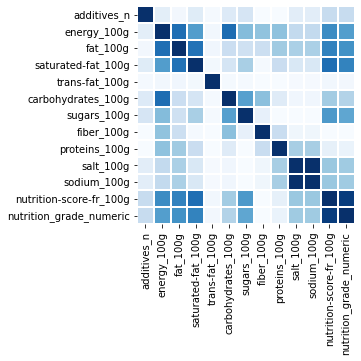

In [136]:
corr = df_cleaned.corr()

ax1 = sns.heatmap(corr, cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues')

plt.show()

- Une heatmap entre les différentes valeurs nutritionnelles va nous permettre d'établir rapidement de possibles corrélations entre elles.

- Le sel et le sodium sont très fortement corrélés et l'une des variable peux donc etre éliminé (le sodium sera éliminé etant la feature la moins complète). Idem pour le grade nutritionnel, classé de "a" à "e", qui une fois passé en numérique correspond au scrore nutritionnel. De plus les graisses saturés sont fortement corrélé avec les graisses et sucres avec carbohydrates, cela peux nous aider  compléter ces colonnes.

#### ANOVA

In [137]:
ser_grouped_aliments = df_cleaned.groupby(by="pnns_groups_2", dropna=True).mean()

In [138]:
df_grouped_aliments = ser_grouped_aliments.reset_index()
df_grouped_aliments

,pnns_groups_2,additives_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition_grade_numeric
0,Alcoholic beverages,0.214442,317.945455,0.864412,0.172857,NaN,5.561304,2.792683,0.049500,0.436225,0.103185,0.040623,8.509434,3.150943
1,Appetizers,1.770335,2033.523546,26.315928,4.155607,0.019608,53.646348,3.520457,3.754843,7.159259,1.552601,0.611258,12.085208,2.645535
2,Artificially sweetened beverages,5.545082,58.879540,0.125420,0.044182,0.000000,2.745532,2.699467,0.303595,0.217753,0.044270,0.017429,3.408451,1.934272
3,Biscuits and cakes,4.079002,1864.401038,19.422137,8.837021,0.180279,60.695806,30.717740,2.852317,6.172978,0.617489,0.243104,18.218535,3.426906
4,Bread,1.610937,1366.741602,5.867650,1.311857,0.029565,56.558966,5.079740,4.402647,9.461469,1.214911,0.478314,2.939730,1.214116
5,Breakfast cereals,1.795895,1708.281772,8.992169,2.953633,0.000000,70.623631,22.241174,5.716982,8.384091,0.535748,0.210935,7.733195,2.032058
6,Cereals,0.510296,1316.695927,3.552816,1.248987,0.029459,59.160854,3.290702,3.254977,9.626081,0.351948,0.138562,-0.983533,0.621612
7,Cheese,0.789504,876.159175,17.725705,10.578271,0.000000,3.241112,2.710143,0.149781,13.005580,1.078612,0.424648,9.377778,2.231746
8,Chocolate products,1.758382,1990.917107,28.412855,13.233081,0.057143,46.895200,41.370173,3.739407,6.711435,0.186287,0.073340,20.559792,3.611785
9,Dairy desserts,3.365414,622.203414,6.168041,4.002439,0.000000,19.317606,15.678353,0.631617,3.835007,0.149262,0.058765,5.991098,1.983680


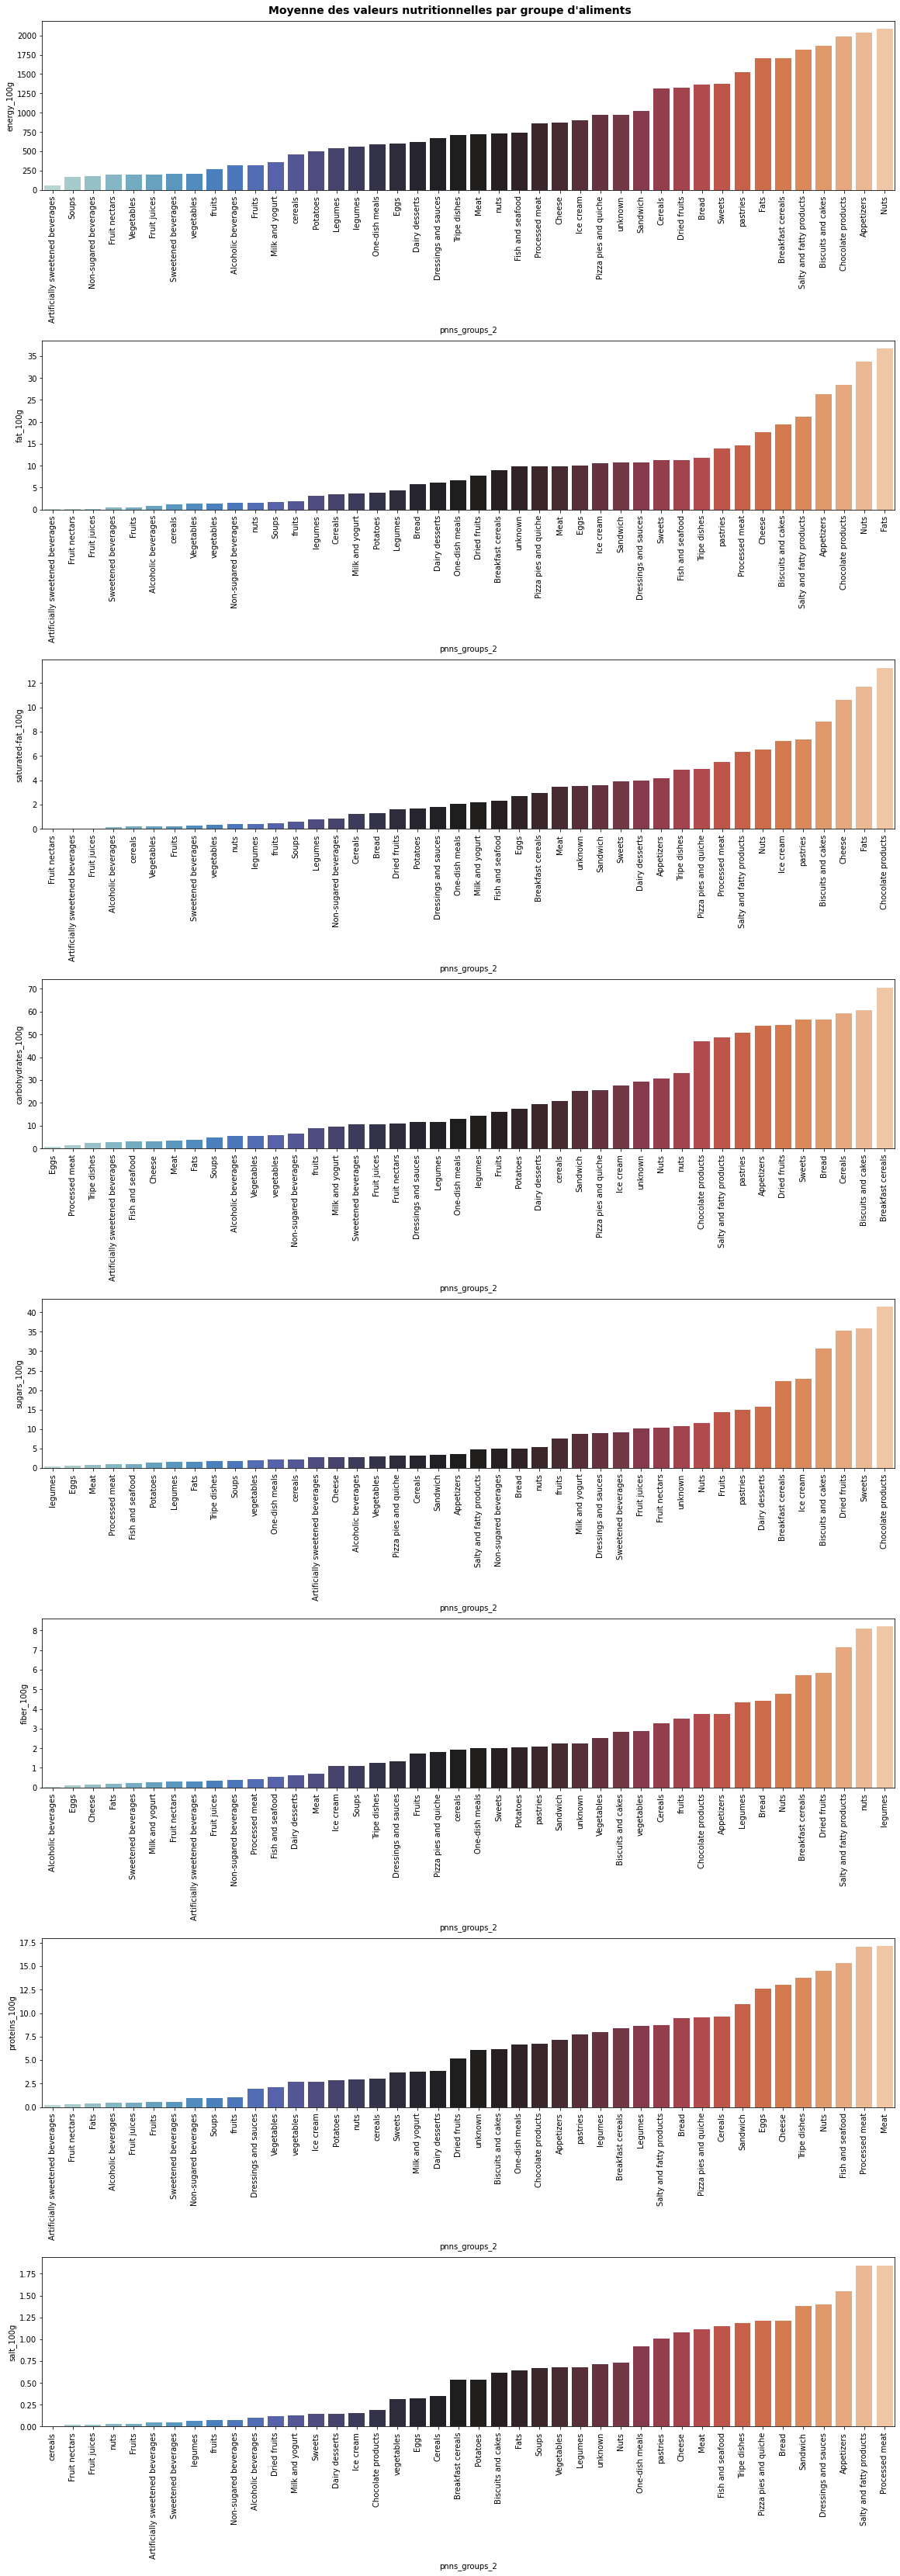

In [139]:
fig, axs = plt.subplots(nrows=8, ncols=1, constrained_layout=True, figsize=(16, 46))
fig.suptitle("Moyenne des valeurs nutritionnelles par groupe d'aliments", size=14, fontweight="bold")
for ax in axs:
    ax.tick_params(axis='x', labelrotation=90)

sns.barplot(x='pnns_groups_2', y='energy_100g', data=df_grouped_aliments, ax=axs[0], palette="icefire",
            order=df_grouped_aliments.sort_values('energy_100g',ascending = True).pnns_groups_2)
sns.barplot(x='pnns_groups_2', y='fat_100g', data=df_grouped_aliments, ax=axs[1], palette="icefire",
           order=df_grouped_aliments.sort_values('fat_100g',ascending = True).pnns_groups_2)
sns.barplot(x='pnns_groups_2', y='saturated-fat_100g', data=df_grouped_aliments, ax=axs[2], palette="icefire",
           order=df_grouped_aliments.sort_values('saturated-fat_100g',ascending = True).pnns_groups_2)
sns.barplot(x='pnns_groups_2', y='carbohydrates_100g', data=df_grouped_aliments, ax=axs[3], palette="icefire",
           order=df_grouped_aliments.sort_values('carbohydrates_100g',ascending = True).pnns_groups_2)
sns.barplot(x='pnns_groups_2', y='sugars_100g', data=df_grouped_aliments, ax=axs[4], palette="icefire",
           order=df_grouped_aliments.sort_values('sugars_100g',ascending = True).pnns_groups_2)
sns.barplot(x='pnns_groups_2', y='fiber_100g', data=df_grouped_aliments, ax=axs[5], palette="icefire",
            order=df_grouped_aliments.sort_values('fiber_100g',ascending = True).pnns_groups_2)
sns.barplot(x='pnns_groups_2', y='proteins_100g', data=df_grouped_aliments, ax=axs[6], palette="icefire",
            order=df_grouped_aliments.sort_values('proteins_100g',ascending = True).pnns_groups_2)
sns.barplot(x='pnns_groups_2', y='salt_100g', data=df_grouped_aliments, ax=axs[7], palette="icefire",
            order=df_grouped_aliments.sort_values('salt_100g',ascending = True).pnns_groups_2)


plt.show()

* Regrouper les entrées du dataset par leur catégorie d'aliment permet de mettre en evidence les differences nutritionnelles entre celles-ci.

In [140]:
df_anova = df_cleaned[['pnns_groups_2', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']]

In [141]:
column_to_transform = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']
dfs_nutrition = {}

for c in column_to_transform:
    dfs_nutrition["{0}".format(c)] = df_anova[['pnns_groups_2', c]]
    dfs_nutrition["{0}".format(c)] = dfs_nutrition["{0}".format(c)].dropna()
    

In [142]:
serie_nutrition = {}

for s in dfs_nutrition:
    serie_nutrition["{0}".format(s)] = dfs_nutrition[s].groupby("pnns_groups_2").agg(list)

In [194]:
anova_1 = f_oneway(serie_nutrition['proteins_100g'].loc['Eggs'].values[0], serie_nutrition['proteins_100g'].loc['Fruits'].values[0])
print(f"Groupe 1, protéines sur oeufs/fruits: {anova_1}")

Groupe 1, protéines sur oeufs/fruits: F_onewayResult(statistic=55654.42652776591, pvalue=0.0)


In [192]:
anova_2 = f_oneway(serie_nutrition['fat_100g'].loc['Chocolate products'].values[0], serie_nutrition['fat_100g'].loc['Nuts'].values[0])
print(f"Groupe 2, graisses sur produits chocolatiers/noix: {anova_2}")

Groupe 2, graisses sur produits chocolatiers/noix: F_onewayResult(statistic=21.994418247199818, pvalue=3.2346105002873795e-06)


In [193]:
anova_3 = f_oneway(serie_nutrition['proteins_100g'].loc['Eggs'].values[0], serie_nutrition['proteins_100g'].loc['Cheese'].values[0], serie_nutrition['proteins_100g'].loc['Meat'].values[0], serie_nutrition['proteins_100g'].loc['Processed meat'].values[0])
print(f"Groupe 3, protéines sur oeufs/fromage/viande/viande transformée: {anova_3}")

Groupe 3, protéines sur oeufs/fromage/viande/viande transformée: F_onewayResult(statistic=246.9170059423937, pvalue=5.69978430604158e-147)


* Pour aller plus loin, nous effectuons des ANOVA entre différentes catégories d'aliments et certaines valeurs nutritionnelles. Sur les tests précédents nous voyons que l'hypothèse de similarité ne fonctionne pas (pvalue infèrieure à 0.05), la ou elle fonctionne pour les groupes 2 et 3.

## Imputation

- On met en place une fonction pour automatiser la completion de données

In [147]:
df_test = df_cleaned.head(50)
df_test

,product_name,brands,categories,categories_fr,countries_fr,ingredients_text,serving_size,additives_n,additives,additives_fr,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category_fr,image_url,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition_grade_numeric
0,Farine de blé noir,Ferme t'y R'nao,NaN,NaN,France,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Peanuts,Torn & Glasser,NaN,NaN,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,NaN,b,NaN,NaN,NaN,NaN,1941.0,17.86,0.00,0.0,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,1.0
4,Organic Polenta,Bob's Red Mill,NaN,NaN,États-Unis,Organic polenta,35 g (0.25 cup),0.0,[ organic-polenta -> en:organic-polenta ] [...,NaN,NaN,NaN,NaN,NaN,NaN,1552.0,1.43,NaN,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN
5,Breadshop Honey Gone Nuts Granola,Unfi,NaN,NaN,États-Unis,"Rolled oats, grape concentrate, expeller press...",52 g (0.5 cup),0.0,[ rolled-oats -> en:rolled-oats ] [ oats ->...,NaN,NaN,NaN,NaN,NaN,NaN,1933.0,18.27,1.92,NaN,63.46,11.54,7.7,13.46,NaN,NaN,NaN,NaN
6,Organic Long Grain White Rice,Lundberg,NaN,NaN,États-Unis,Organic long grain white rice,45 g (0.25 cup),0.0,[ organic-long-grain-white-rice -> en:organic...,NaN,NaN,NaN,NaN,NaN,NaN,1490.0,NaN,NaN,NaN,80.00,NaN,NaN,8.89,NaN,NaN,NaN,NaN
11,Organic Penne Pasta,Gardentime,NaN,NaN,États-Unis,Organic refined durum semolina wheat flour,57 g (0.5 cup),0.0,[ organic-refined-durum-semolina-wheat-flour ...,NaN,NaN,NaN,NaN,NaN,NaN,1540.0,1.75,NaN,NaN,73.68,NaN,1.8,14.04,NaN,NaN,NaN,NaN
12,Zen Party Mix,Sunridge,NaN,NaN,États-Unis,"Roasted peanuts (peanuts, peanut or canola oil...",30 g (0.25 cup),1.0,[ roasted-peanuts -> en:roasted-peanuts ] [...,E100 - Curcumine,d,NaN,NaN,NaN,NaN,2230.0,36.67,5.00,NaN,36.67,3.33,6.7,16.67,1.60782,0.633,12.0,3.0
18,Lotus Organic Brown Jasmine Rice,Unfi,NaN,NaN,États-Unis,Organic brown jasmine rice,45 g (0.25 cup),0.0,[ organic-brown-jasmine-rice -> en:organic-br...,NaN,NaN,NaN,NaN,NaN,NaN,1582.0,2.22,NaN,NaN,77.78,2.22,2.2,8.89,NaN,NaN,NaN,NaN
20,Energy Power Mix,Sunridge,NaN,NaN,États-Unis,"Yogurt raisins, tamari roasted almonds, organi...",40 g (0.25 cup),0.0,[ yogurt-raisins -> en:yogurt-raisins ] [ r...,NaN,d,NaN,NaN,NaN,NaN,1464.0,17.50,7.50,NaN,42.50,32.50,5.0,7.50,0.28448,0.112,14.0,3.0
21,Antioxidant Mix - Berries & Chocolate,Sunridge,NaN,NaN,États-Unis,"Chocolate stars (dehydrated cane juice, sweete...",30 g (0.25 cup),1.0,[ chocolate-stars -> en:chocolate-stars ] [...,E322 - Lécithines,d,NaN,NaN,NaN,NaN,2092.0,33.33,6.67,NaN,46.67,30.00,6.7,13.33,0.46482,0.183,15.0,3.0


In [149]:
def imputation(dataset_basic, dataset_aliments):
    df_cleaned = dataset_basic
    df_grouped_aliments = dataset_aliments
    food_category = df_grouped_aliments['pnns_groups_2'].unique()
    feature_to_complete = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g', 'carbohydrates_100g', 'sugars_100g',
                           'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']


    for index, row in df_cleaned.iterrows():
        if pd.isna(row["pnns_groups_2"]):
            pass
        else:
            #print(row["pnns_groups_2"])
            for feature in feature_to_complete:
                if pd.isna(row[feature]):
                    #print(f"{row[feature]} a remplacer")
                    #print(f"par {df_grouped_aliments.loc[df_grouped_aliments['pnns_groups_2'] == row['pnns_groups_2'], feature].iloc[0]}")
                    df_cleaned.at[index, feature] = df_grouped_aliments.loc[df_grouped_aliments['pnns_groups_2'] == row["pnns_groups_2"], feature].iloc[0]
                else:
                    pass

    mediane_graisse = df_cleaned['fat_100g'].median()
    mediane_graisse_sat = df_cleaned['saturated-fat_100g'].median()
    coeff_conversion_graisse = mediane_graisse / mediane_graisse_sat
    mediane_sel = df_cleaned['salt_100g'].median()
    mediane_sodium = df_cleaned['sodium_100g'].median()
    coeff_conversion_sel = mediane_sel / mediane_sodium
    mediane_carb = df_cleaned['carbohydrates_100g'].median()
    mediane_sucre = df_cleaned['sugars_100g'].median()
    mediane_energy = df_cleaned['energy_100g'].median()
    mediane_fiber = df_cleaned['fiber_100g'].median()
    mediane_protein = df_cleaned['proteins_100g'].median()
    coeff_conversion_carb = mediane_carb / mediane_sucre

    df_cleaned['saturated-fat_100g'] = df_cleaned['saturated-fat_100g'].fillna(df_cleaned['fat_100g']/coeff_conversion_graisse)
    df_cleaned['saturated-fat_100g'] = df_cleaned['saturated-fat_100g'].fillna(mediane_graisse_sat)
    df_cleaned["fat_100g"] = df_cleaned["fat_100g"].fillna(df_cleaned['saturated-fat_100g']*coeff_conversion_graisse)
    df_cleaned["fat_100g"] = df_cleaned["fat_100g"].fillna(mediane_graisse)
    df_cleaned['trans-fat_100g'] = df_cleaned['trans-fat_100g'].fillna(0)
    df_cleaned["sodium_100g"] = df_cleaned["sodium_100g"].fillna(df_cleaned['salt_100g']/coeff_conversion_sel)
    df_cleaned["sodium_100g"] = df_cleaned["sodium_100g"].fillna(mediane_sodium)
    df_cleaned["salt_100g"] = df_cleaned["salt_100g"].fillna(df_cleaned['sodium_100g']*coeff_conversion_sel)
    df_cleaned["salt_100g"] = df_cleaned["salt_100g"].fillna(mediane_sel)
    df_cleaned["sugars_100g"] = df_cleaned["sugars_100g"].fillna(df_cleaned['carbohydrates_100g']/coeff_conversion_carb)
    df_cleaned["sugars_100g"] = df_cleaned["sugars_100g"].fillna(mediane_sucre)
    df_cleaned["carbohydrates_100g"] = df_cleaned["carbohydrates_100g"].fillna(df_cleaned['sugars_100g']*coeff_conversion_carb)
    df_cleaned["carbohydrates_100g"] = df_cleaned["carbohydrates_100g"].fillna(mediane_carb)
    df_cleaned['energy_100g'] = df_cleaned['energy_100g'].fillna(mediane_energy)
    df_cleaned['fiber_100g'] = df_cleaned['fiber_100g'].fillna(mediane_fiber)
    df_cleaned['proteins_100g'] = df_cleaned['proteins_100g'].fillna(mediane_protein)
    
    return df_cleaned
            
df_cleaned = imputation(df_cleaned, df_grouped_aliments)

df_cleaned

,product_name,brands,categories,categories_fr,countries_fr,ingredients_text,serving_size,additives_n,additives,additives_fr,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category_fr,image_url,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition_grade_numeric
0,Farine de blé noir,Ferme t'y R'nao,NaN,NaN,France,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,787.000000,4.000000,1.500000,0.0,17.000000,5.260000,1.500000,4.350000,0.586740,0.231000,NaN,NaN
2,Peanuts,Torn & Glasser,NaN,NaN,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,NaN,b,NaN,NaN,NaN,NaN,1941.000000,17.860000,0.000000,0.0,60.710000,17.860000,7.100000,17.860000,0.635000,0.250000,0.0,1.0
4,Organic Polenta,Bob's Red Mill,NaN,NaN,États-Unis,Organic polenta,35 g (0.25 cup),0.0,[ organic-polenta -> en:organic-polenta ] [...,NaN,NaN,NaN,NaN,NaN,NaN,1552.000000,1.430000,0.536250,0.0,77.140000,23.868024,5.700000,8.570000,0.586740,0.231000,NaN,NaN
5,Breadshop Honey Gone Nuts Granola,Unfi,NaN,NaN,États-Unis,"Rolled oats, grape concentrate, expeller press...",52 g (0.5 cup),0.0,[ rolled-oats -> en:rolled-oats ] [ oats ->...,NaN,NaN,NaN,NaN,NaN,NaN,1933.000000,18.270000,1.920000,0.0,63.460000,11.540000,7.700000,13.460000,0.586740,0.231000,NaN,NaN
6,Organic Long Grain White Rice,Lundberg,NaN,NaN,États-Unis,Organic long grain white rice,45 g (0.25 cup),0.0,[ organic-long-grain-white-rice -> en:organic...,NaN,NaN,NaN,NaN,NaN,NaN,1490.000000,4.000000,1.500000,0.0,80.000000,24.752941,1.500000,8.890000,0.586740,0.231000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295211,Rillette d'oie,"Sans marque,D.Lambert","Viandes,Produits à tartiner,Charcuteries,Produ...","Viandes,Produits à tartiner,Charcuteries,Produ...",France,"viande d'oie, graisse de canard, épices, sel, ...",NaN,0.0,[ viande-d-oie -> fr:viande-d-oie ] [ viand...,NaN,NaN,Fish Meat Eggs,Processed meat,Produits à tartiner salés,http://fr.openfoodfacts.org/images/products/99...,863.508333,14.689962,5.480381,0.0,1.507204,0.921032,0.413987,17.019945,1.845515,0.726576,NaN,NaN
295212,NaN,NaN,Peanuts,"Aliments et boissons à base de végétaux,Alimen...",Royaume-Uni,<NA>,NaN,NaN,NaN,NaN,NaN,Salty snacks,Nuts,Fruits à coques,NaN,2085.111801,33.828276,6.552105,0.0,30.566667,11.512745,4.764158,14.518542,0.733763,0.288868,NaN,NaN
295213,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,NaN,NaN,États-Unis,"Organic peppermint, organic lemon grass, organ...",20 g (0.7 oz),0.0,[ organic-peppermint -> en:organic-peppermint...,NaN,b,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
295214,Tomates aux Vermicelles,Knorr,NaN,NaN,France,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,787.000000,4.000000,1.500000,0.0,17.000000,5.260000,1.500000,4.350000,0.586740,0.231000,NaN,NaN


## ACP

In [150]:
df_acp = df_cleaned.dropna(subset=['nutrition_grade_numeric'])
df_acp_target = df_acp['nutrition_grade_numeric']
df_acp = df_acp[['energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']]

In [151]:
scaler = StandardScaler()

scaler.fit(df_acp)
df_acp = scaler.transform(df_acp) 

In [152]:
mypca = PCA(n_components=2)
mypca.fit(df_acp)
print(mypca.singular_values_) # Valeurs de variance

[723.17363817 590.31057776]


In [153]:
print(mypca.explained_variance_ratio_) #  Pourcentages

[0.33701732 0.22455782]


In [154]:
print(mypca.components_)

[[ 0.50147299  0.44871824  0.38173452  0.02595684  0.31685698  0.21594589
   0.22015505  0.25875944  0.2629887   0.2629887 ]
 [ 0.16256617 -0.01214204  0.0734219   0.01054571  0.3527415   0.45879227
   0.12208568 -0.25135182 -0.52674639 -0.52674614]]


In [155]:
data_sortie = mypca.fit_transform(df_acp)
print(mypca.noise_variance_)

0.5480346044877231


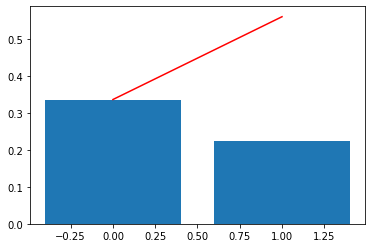

In [156]:
y = list(mypca.explained_variance_ratio_)
x = range(len(y))
ycum = np.cumsum(y)
plt.bar(x,y)
plt.plot(x,ycum,"-r")

plt.show()

In [157]:
PC1 = data_sortie[:,0]
PC2 = data_sortie[:,1]

targets=[]
 
for points in df_acp_target:
    targets.append(points)
    
zipped = list(zip(PC1, 
                  PC2, 
                  targets))
 
pc_df = pd.DataFrame(zipped, 
                     columns=['PC1', 
                              'PC2', 
                              'Targets'])

pc_df

,PC1,PC2,Targets
0,2.210629,0.687177,1.0
1,3.762767,-1.379423,3.0
2,1.560396,1.829495,3.0
3,3.192001,1.478739,3.0
4,1.693138,2.129425,2.0
...,...,...,...
155174,1.369033,0.611327,3.0
155175,-0.296120,1.959440,0.0
155176,1.033721,0.412576,0.0
155177,-2.867327,0.225080,2.0


C:\Users\TERENC~1.COL\AppData\Local\Temp/ipykernel_11320/816090326.py:5: UserWarning: The palette list has more values (9) than needed (5), which may not be intended.
  sns.scatterplot(palette = palette,


Text(0, 0.5, 'Second Principal Component')

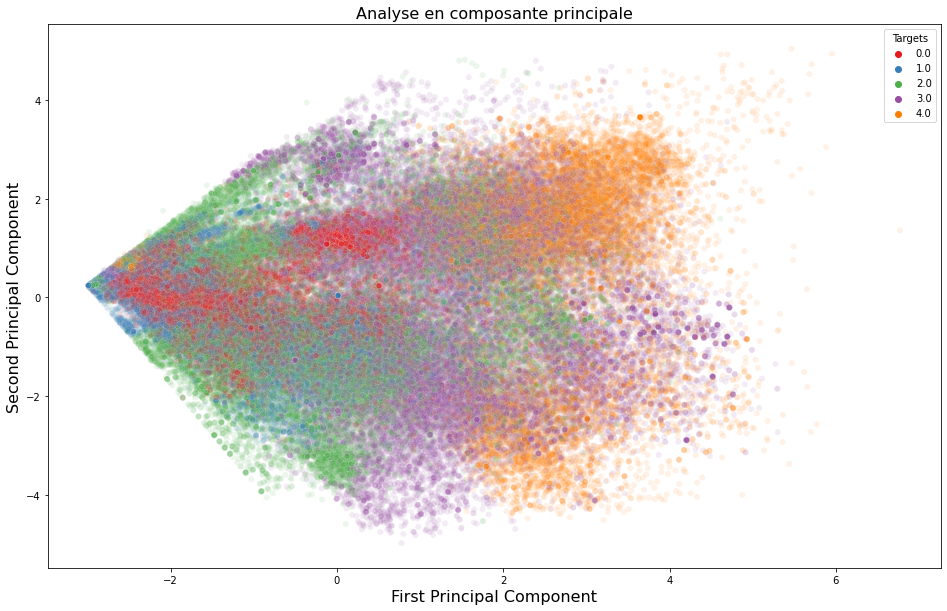

In [158]:
plt.figure(figsize=(16,10))
 

palette = sns.color_palette("Set1")
sns.scatterplot(palette = palette,
                data=pc_df, 
                x="PC1", 
                y="PC2", 
                hue="Targets",
                alpha=0.1)
 
plt.title("Analyse en composante principale",
          fontsize=16)
plt.xlabel('First Principal Component',
           fontsize=16)
plt.ylabel('Second Principal Component',
           fontsize=16)

- Grace à l'ACP et un scatter plot des données obtenues, une certaine forme de corrélation semble se détacher. Surement qu'avec un algorythme non supervisé, plus de groupes se detacheraient, mais en l'état et selon la succession des groupes, un knn semble adapté pour déduire le score nutritionnel des différents aliments.

### Nutrition score avec knn

In [159]:
df_knn = df_cleaned[['energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition_grade_numeric']]

In [160]:
df_knn_with_target = df_knn.dropna(subset=['nutrition_grade_numeric'])
df_knn_with_target

,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition_grade_numeric
2,1941.0,17.86,0.00,0.000000,60.710000,17.86,7.1,17.86,0.63500,0.250000,1.0
12,2230.0,36.67,5.00,0.000000,36.670000,3.33,6.7,16.67,1.60782,0.633000,3.0
20,1464.0,17.50,7.50,0.000000,42.500000,32.50,5.0,7.50,0.28448,0.112000,3.0
21,2092.0,33.33,6.67,0.000000,46.670000,30.00,6.7,13.33,0.46482,0.183000,3.0
24,1954.0,20.00,2.22,0.000000,60.000000,33.33,4.4,8.89,0.19812,0.078000,2.0
...,...,...,...,...,...,...,...,...,...,...,...
295196,1084.0,32.00,12.00,0.000000,33.935361,10.50,0.0,8.70,0.29000,0.114173,3.0
295198,1477.0,0.00,0.00,0.000000,87.060000,2.35,4.7,1.18,0.03048,0.012000,0.0
295203,1643.0,2.80,0.60,0.029565,74.800000,2.60,5.9,13.00,0.68000,0.267717,0.0
295209,21.0,0.20,0.20,0.000000,0.500000,0.50,0.2,0.50,0.02540,0.010000,2.0


In [161]:
df_knn_incomplete =  df_knn[df_knn['nutrition_grade_numeric'].isna()]
df_knn_incomplete

,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition_grade_numeric
0,787.000000,4.000000,1.500000,0.0,17.000000,5.260000,1.500000,4.350000,0.586740,0.231000,NaN
4,1552.000000,1.430000,0.536250,0.0,77.140000,23.868024,5.700000,8.570000,0.586740,0.231000,NaN
5,1933.000000,18.270000,1.920000,0.0,63.460000,11.540000,7.700000,13.460000,0.586740,0.231000,NaN
6,1490.000000,4.000000,1.500000,0.0,80.000000,24.752941,1.500000,8.890000,0.586740,0.231000,NaN
11,1540.000000,1.750000,0.656250,0.0,73.680000,22.797459,1.800000,14.040000,0.586740,0.231000,NaN
...,...,...,...,...,...,...,...,...,...,...,...
295210,787.000000,4.000000,1.500000,0.0,17.000000,5.260000,1.500000,4.350000,0.586740,0.231000,NaN
295211,863.508333,14.689962,5.480381,0.0,1.507204,0.921032,0.413987,17.019945,1.845515,0.726576,NaN
295212,2085.111801,33.828276,6.552105,0.0,30.566667,11.512745,4.764158,14.518542,0.733763,0.288868,NaN
295214,787.000000,4.000000,1.500000,0.0,17.000000,5.260000,1.500000,4.350000,0.586740,0.231000,NaN


In [162]:
scaler = StandardScaler()

scaler.fit(df_knn_with_target.drop('nutrition_grade_numeric',axis=1))
scaled_features = scaler.transform(df_knn_with_target.drop('nutrition_grade_numeric',axis=1))

In [163]:
df_training = pd.DataFrame(scaled_features,columns=df_knn_with_target.columns[:-1])
df_training

,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
0,1.395398,0.754759,-0.757389,-0.056089,1.083565,0.435672,2.524628,2.157362,-0.168612,-0.168612
1,1.813124,2.465780,0.422653,-0.056089,0.212999,-0.599719,2.329190,1.937565,1.207427,1.207426
2,0.705932,0.722012,1.012674,-0.056089,0.424122,1.478901,1.498578,0.243831,-0.664417,-0.664417
3,1.613656,2.161962,0.816787,-0.056089,0.575132,1.300754,2.329190,1.320654,-0.409329,-0.409329
4,1.414188,0.949421,-0.233450,-0.056089,1.057854,1.538046,1.205420,0.500570,-0.786572,-0.786572
...,...,...,...,...,...,...,...,...,...,...
155174,0.156673,2.040981,2.074711,-0.056089,0.113969,-0.088793,-0.944400,0.465476,-0.656609,-0.656609
155175,0.724723,-0.869846,-0.757389,-0.056089,2.037783,-0.669552,1.351999,-0.923496,-1.023696,-1.023696
155176,0.964663,-0.615149,-0.615784,-0.026545,1.593809,-0.651738,1.938314,1.259702,-0.104960,-0.104960
155177,-1.379809,-0.851654,-0.710187,-0.056089,-1.096832,-0.801381,-0.846681,-1.049095,-1.030882,-1.030882


In [164]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df_knn_with_target['nutrition_grade_numeric'],test_size=0.30)

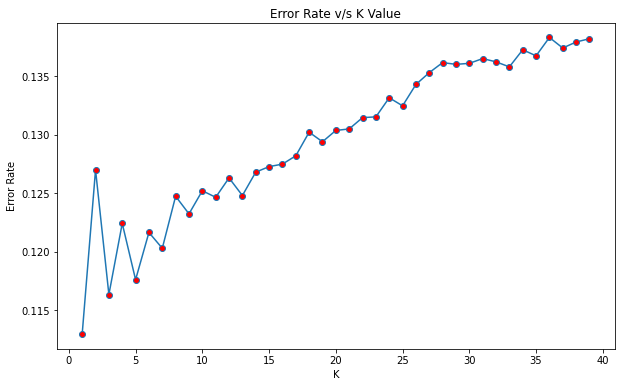

In [165]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,marker='o',
markerfacecolor='red')
plt.title('Error Rate v/s K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

plt.show()

In [166]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [167]:
pred = knn.predict(X_test)

In [168]:
print(confusion_matrix(y_test,pred))

[[ 8403   689    83     2     1]
 [  663  7929   670    43    40]
 [   77   862  9086   606    33]
 [    5    74   654 10153   350]
 [   11   126    89   522  5383]]


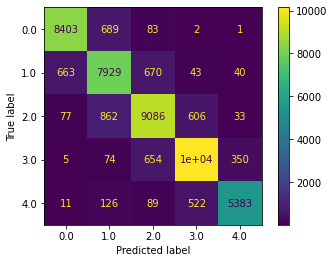

In [202]:
cm = confusion_matrix(y_test,pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

plt.show()

In [169]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92      9178
         1.0       0.82      0.85      0.83      9345
         2.0       0.86      0.85      0.86     10664
         3.0       0.90      0.90      0.90     11236
         4.0       0.93      0.88      0.90      6131

    accuracy                           0.88     46554
   macro avg       0.88      0.88      0.88     46554
weighted avg       0.88      0.88      0.88     46554



* Nous entrainons un KNN pour compléter notre feature concernant le grade nutritionnel.

* Enfin, étant satisfait des résultats de notre modèle, nous enregistron celui-ci grace à la bibliothèque pickle afin de ne pas avoir à réeffectuer un entrainement lors de l'utilisation de notre dashboard.

In [181]:
pickle.dump(knn, open("model_knn_nutrition_grade", 'wb'))

### Prediction nutrition grade

In [170]:
scaler.fit(df_knn_incomplete.drop('nutrition_grade_numeric',axis=1))
scaled_features_to_predict = scaler.transform(df_knn_incomplete.drop('nutrition_grade_numeric',axis=1))

In [171]:
df_training_to_predict = pd.DataFrame(scaled_features_to_predict,columns=df_knn_incomplete.columns[:-1])

In [172]:
final_pred = knn.predict(df_training_to_predict)

C:\Users\terence.collin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [173]:
df_knn_incomplete['nutrition_grade_numeric'] = final_pred
#df_knn_incomplete

C:\Users\TERENC~1.COL\AppData\Local\Temp/ipykernel_11320/2512675999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_knn_incomplete['nutrition_grade_numeric'] = final_pred


In [174]:
df_complete = pd.concat([df_knn_with_target, df_knn_incomplete])
df_complete = df_complete.sort_index()

In [175]:
df_finale = pd.merge(df_cleaned[['product_name', 'brands', 'countries_fr', 'pnns_groups_2', 'ingredients_text',
                                 'additives_n', 'additives']], df_complete, left_index=True, right_index=True)
df_finale = df_finale.dropna(subset=['product_name','brands'])
df_finale = df_finale.reset_index(drop=True)
df_finale

,product_name,brands,countries_fr,pnns_groups_2,ingredients_text,additives_n,additives,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition_grade_numeric
0,Farine de blé noir,Ferme t'y R'nao,France,NaN,<NA>,NaN,NaN,787.000000,4.000000,1.500000,0.0,17.000000,5.260000,1.500000,4.350000,0.586740,0.231000,2.0
1,Peanuts,Torn & Glasser,États-Unis,NaN,"Peanuts, wheat flour, sugar, rice flour, tapio...",0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,1941.000000,17.860000,0.000000,0.0,60.710000,17.860000,7.100000,17.860000,0.635000,0.250000,1.0
2,Organic Polenta,Bob's Red Mill,États-Unis,NaN,Organic polenta,0.0,[ organic-polenta -> en:organic-polenta ] [...,1552.000000,1.430000,0.536250,0.0,77.140000,23.868024,5.700000,8.570000,0.586740,0.231000,2.0
3,Breadshop Honey Gone Nuts Granola,Unfi,États-Unis,NaN,"Rolled oats, grape concentrate, expeller press...",0.0,[ rolled-oats -> en:rolled-oats ] [ oats ->...,1933.000000,18.270000,1.920000,0.0,63.460000,11.540000,7.700000,13.460000,0.586740,0.231000,3.0
4,Organic Long Grain White Rice,Lundberg,États-Unis,NaN,Organic long grain white rice,0.0,[ organic-long-grain-white-rice -> en:organic...,1490.000000,4.000000,1.500000,0.0,80.000000,24.752941,1.500000,8.890000,0.586740,0.231000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203453,Thé vert Earl grey,Lobodis,France,Non-sugared beverages,"thé vert, arôme naturel bergamote avec autres ...",0.0,[ the-vert -> fr:the-vert ] [ the -> fr:the...,21.000000,0.200000,0.200000,0.0,0.500000,0.500000,0.200000,0.500000,0.025400,0.010000,2.0
203454,Rillette d'oie,"Sans marque,D.Lambert",France,Processed meat,"viande d'oie, graisse de canard, épices, sel, ...",0.0,[ viande-d-oie -> fr:viande-d-oie ] [ viand...,863.508333,14.689962,5.480381,0.0,1.507204,0.921032,0.413987,17.019945,1.845515,0.726576,4.0
203455,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,États-Unis,NaN,"Organic peppermint, organic lemon grass, organ...",0.0,[ organic-peppermint -> en:organic-peppermint...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
203456,Tomates aux Vermicelles,Knorr,France,NaN,<NA>,NaN,NaN,787.000000,4.000000,1.500000,0.0,17.000000,5.260000,1.500000,4.350000,0.586740,0.231000,2.0


In [176]:
df_finale.describe()

,additives_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition_grade_numeric
count,170519.000000,203458.000000,203458.000000,203458.000000,203458.000000,203458.000000,203458.000000,203458.000000,203458.000000,203458.000000,203458.000000,203458.000000
mean,2.066268,890.649600,8.434445,2.854082,0.049222,27.849475,11.040687,1.839412,5.581188,0.693028,0.272856,1.886276
std,2.596210,665.643512,10.360047,3.940490,0.881433,26.466154,13.314385,1.848498,5.305138,0.678800,0.267242,1.294693
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,297.000000,0.390000,0.000000,0.000000,6.471346,1.790000,0.258282,0.937347,0.096520,0.038000,1.000000
50%,1.000000,787.000000,4.000000,1.248987,0.000000,17.000000,5.260000,1.500000,4.350000,0.586740,0.231000,2.000000
75%,3.000000,1434.000000,12.800000,3.850000,0.000000,49.230000,14.340437,2.500854,8.000000,1.080000,0.425197,3.000000
max,31.000000,3573.000000,50.000000,18.750000,173.260000,177.110266,54.840000,9.000000,22.730000,2.890520,1.138000,4.000000


([<matplotlib.axis.XTick at 0x190dbeff340>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

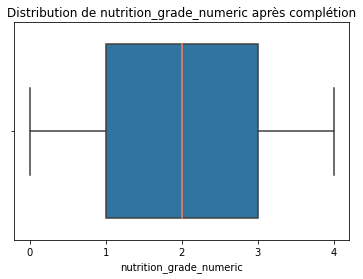

In [210]:
sns.boxplot(x=df_finale["nutrition_grade_numeric"], medianprops={"color": "coral"}).set(title="Distribution de nutrition_grade_numeric après complétion")
plt.xticks([0, 1, 2, 3, 4])

## Conclusion

- On reconstruit le dataset en rassemblant les valeurs desciptives et les valeurs nutritionnelles en fonction de l'index des lignes et on finalise le dataset en elliminant les lignes ne possédant ni nom, ni marque, celles-ci nous étant inutile pour les retrouver via notre application. Nous avons désormait un dataset presque complet et nous pouvons passer à la fabrication de l'api.

<AxesSubplot: >

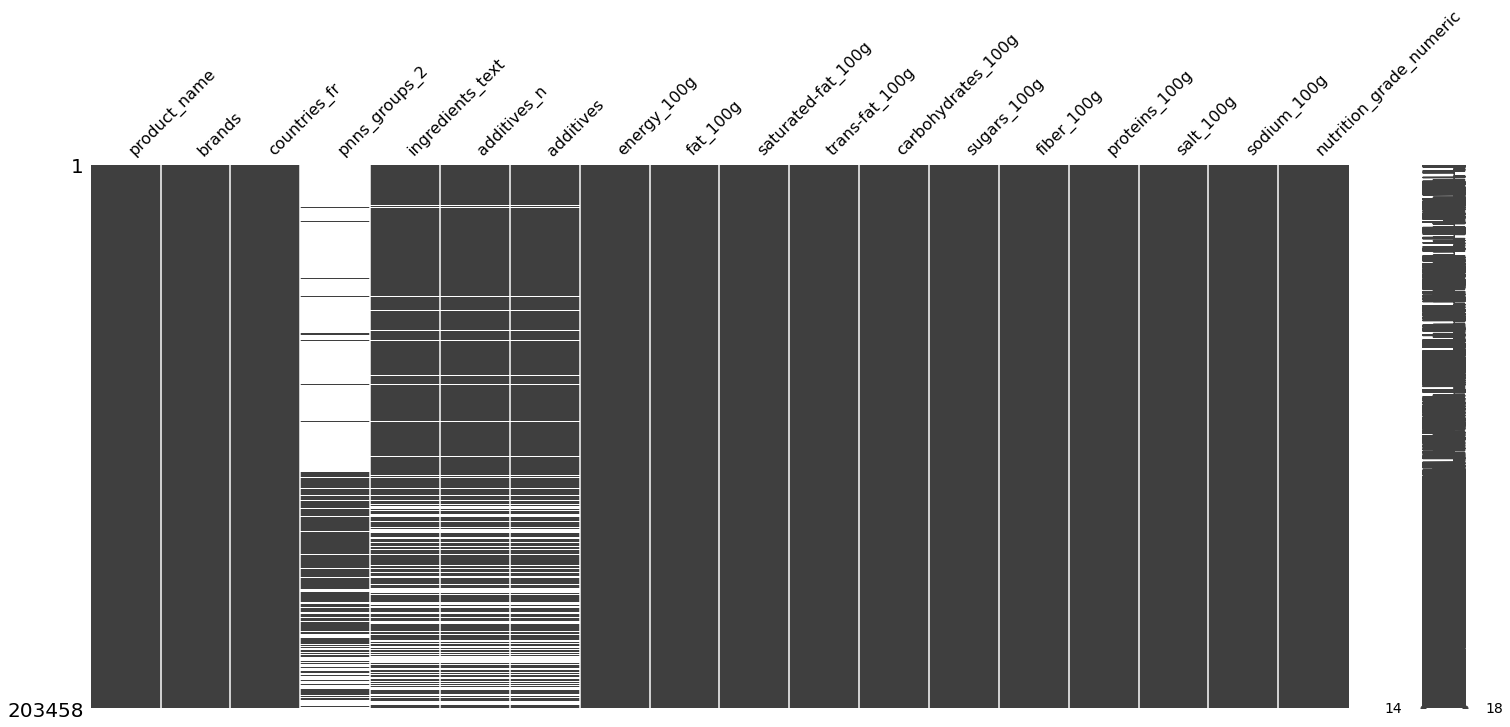

In [177]:
msno.matrix(df_finale)